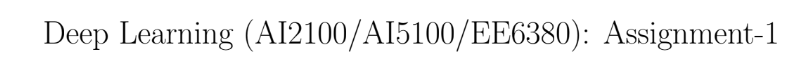


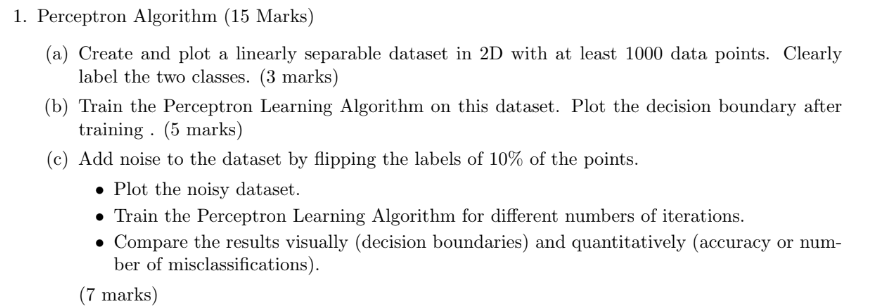


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Perceptron Algorithm


## (a) Creation and plotting a linearly separable dataset in 2D having 1100 data points.


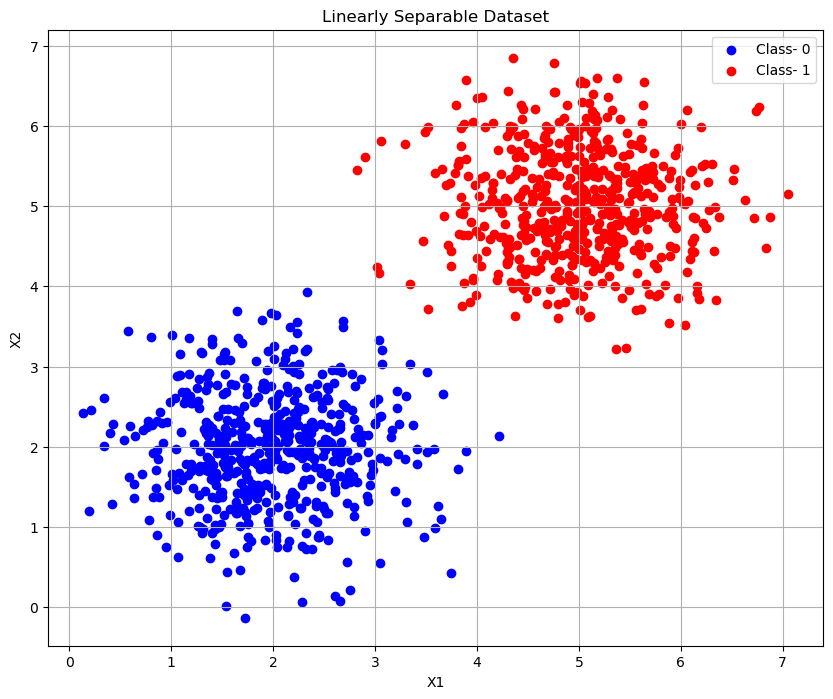

In [ ]:
np.random.seed(0)
nP = 1100

data1 = np.random.normal(2, 0.7, (nP // 2, 2))  
data2 = np.random.normal(5, 0.7, (nP // 2, 2))  

x = np.vstack([data1, data2])
X = np.hstack([x,np.ones((x.shape[0],1))]) 
Y = np.hstack([-np.ones(nP//2), np.ones(nP//2)])

#creating the plot 
plt.figure(figsize=(10,8))
plt.scatter(x[:int(nP//2),0],x[:int(nP//2),1],label="Class- 0",color="blue",marker="o")
plt.scatter(x[int(nP//2):,0],x[int(nP//2):,1],label="Class- 1",color="red",marker="o")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def train_perceptron(x, y, w, nb_epochs_max):
    for e in range(nb_epochs_max):
        nb_changes = 0
        for i in range(x.shape[0]):
            pred = x[i].dot(w)
            if pred * y[i] <= 0:  # misclassified when pred and y[i] have different signs
                w = w + y[i] * x[i]  
                nb_changes += 1
        
        # early stopping condition
        if nb_changes == 0:
            print('Early stopping at epoch number', e)
            break
    return w

In [7]:
w = np.zeros(3)
W = train_perceptron(X,Y, w, 172)
print(W)

Early stopping at epoch number 89
[  6.4580978    8.24237149 -51.        ]


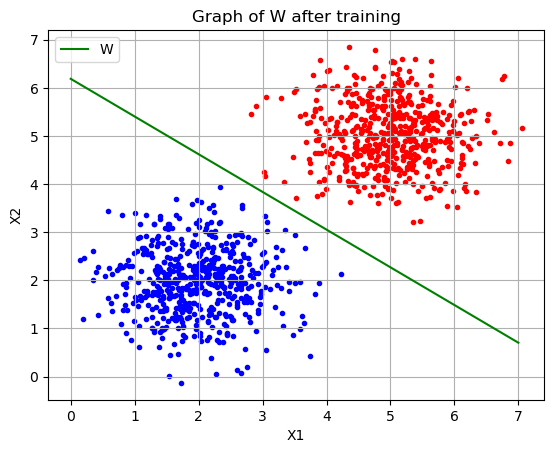

In [8]:
# Ploting the data and W after training
x = np.linspace(0,7,100)
#For a 2D perceptron, the decision boundary is a line of the form:
#W1y + W2x + W3 = 0
y = -(W[0]/W[1])*x - (W[2]/W[1]) 
plt.plot(x, y, '-g', label='W')
plt.title('Graph of W after training')
plt.legend(loc='upper left')
plt.scatter(X[:int(nP/2),0],X[:int(nP/2),1],label="Class- 0",color="blue",marker=".")
plt.scatter(X[int(nP/2):,0],X[int(nP/2):,1],label="Class- 1",color="red",marker=".")
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

## Adding noise by misclassifying 10% data points


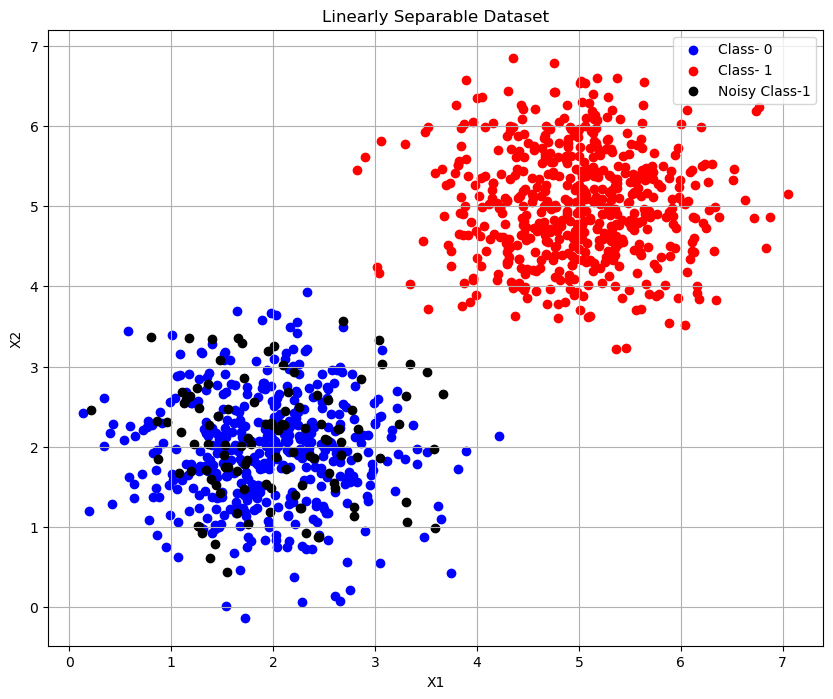

In [10]:
Y_noise = Y.copy()
n = int(0.1*len(X)) # number of flipped rows
Y_noise[:n] = np.ones(n)

plt.figure(figsize=(10,8))
plt.scatter(X[n:int(nP/2),0],X[n:int(nP/2),1],label="Class- 0",color="blue",marker="o")
plt.scatter(X[int(nP/2):,0],X[int(nP/2):,1],label="Class- 1",color="red",marker="o")
plt.scatter(X[:n,0],X[:n,1],label="Noisy Class-1",color="black",marker="o")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#finding misclassified points
W_noise = []
misClassify = []
iterations = range(100,3000,100)
for i in iterations:
    w = np.zeros(3)
    w = train_perceptron(X,Y_noise, w, i)
    n_misClassify = 0
    for j in range(len(X)):
        pred = w.dot(X[j])
        pred_class = 1 if pred*Y[j]>=0 else -1
        if(Y[j] != pred_class):
            n_misClassify = n_misClassify+1
    W_noise.append(w)
    misClassify.append(n_misClassify)
    print(f"\r Iteration: {i} is going on",end="")

 Iteration: 2900 is going on

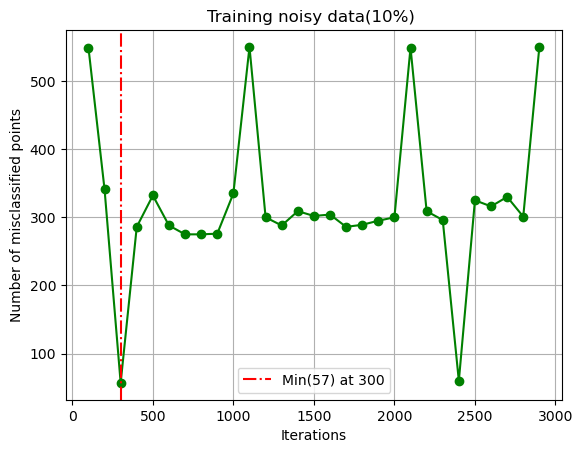

In [12]:
iter_min_misclassified = iterations[np.argmin(misClassify)]
plt.plot(iterations, misClassify, color="g", marker="o")
plt.xlabel("Iterations")
plt.ylabel("Number of misclassified points")
plt.title("Training noisy data(10%) ")
plt.axvline(x=iter_min_misclassified, color='r', linestyle='-.', label=f'Min({np.min(misClassify)}) at {iter_min_misclassified}')
plt.legend()
plt.grid()

In [13]:
misClassify1_noise = misClassify # for further use in comparing

- When we have non-noisy and well linearly separable dataset,model is converging but as soon as i add noise,the model is not converging even on increasing number of iterations
- We can see at iteration(=300 or = 2400) misclasified point is 60 and we getting optimal value for this dataset,model is not converging


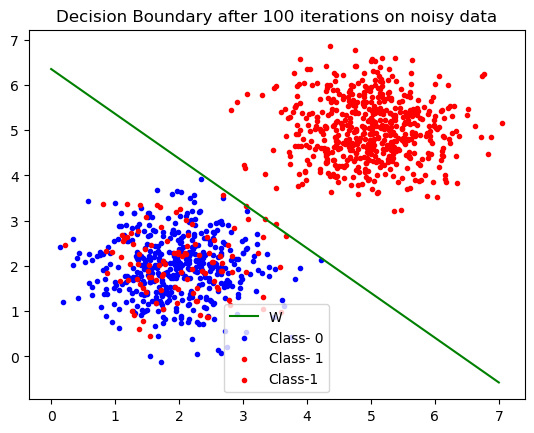

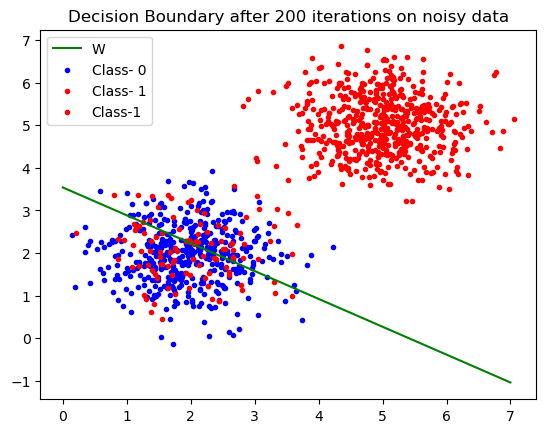

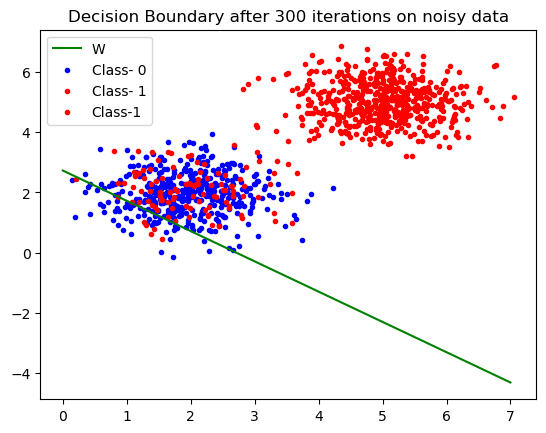

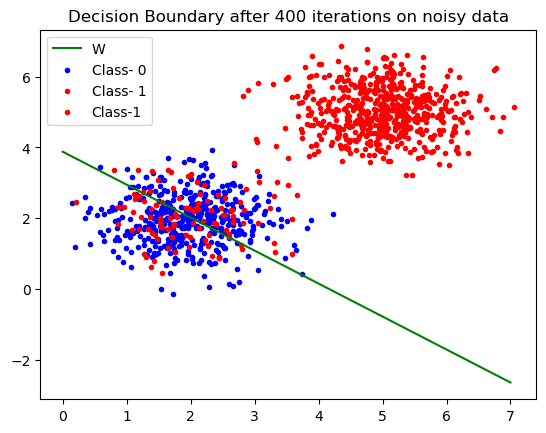

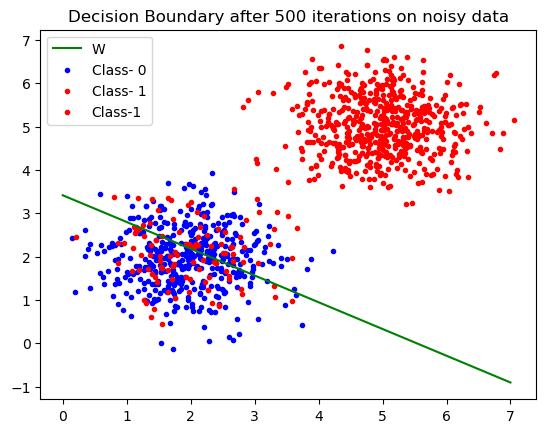

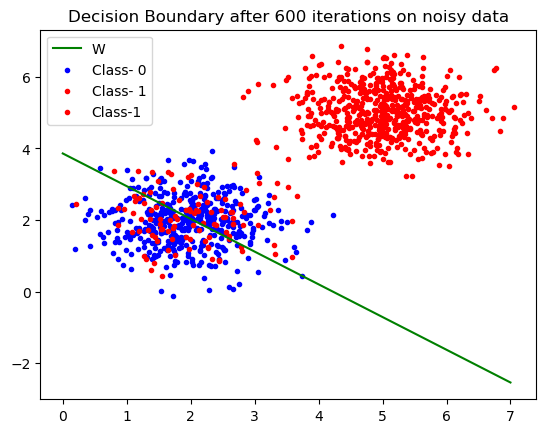

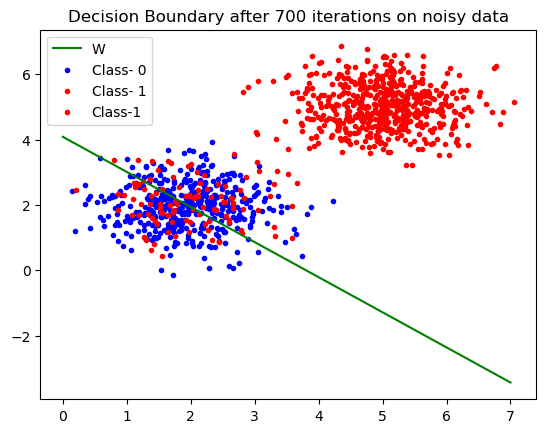

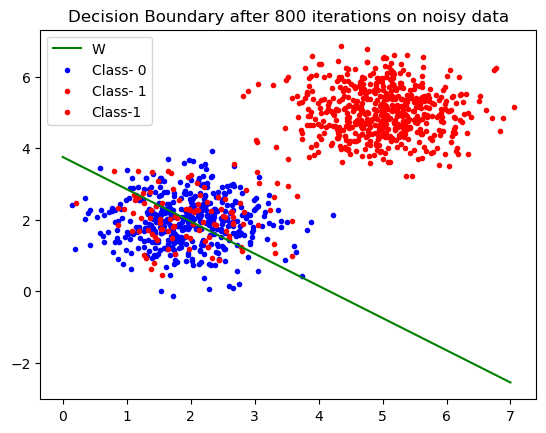

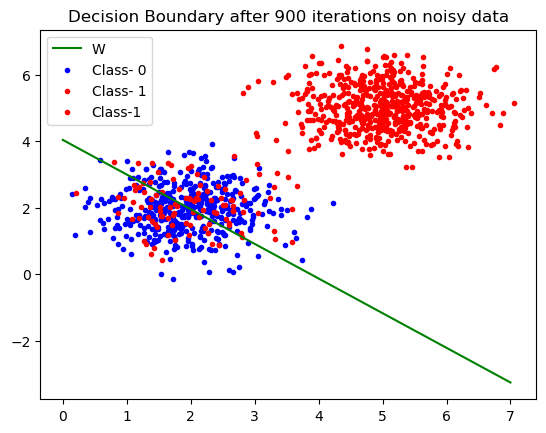

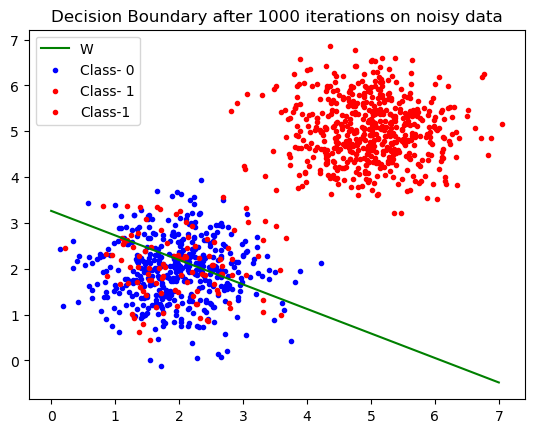

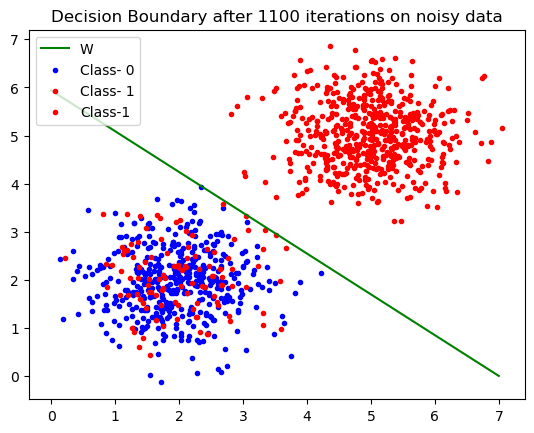

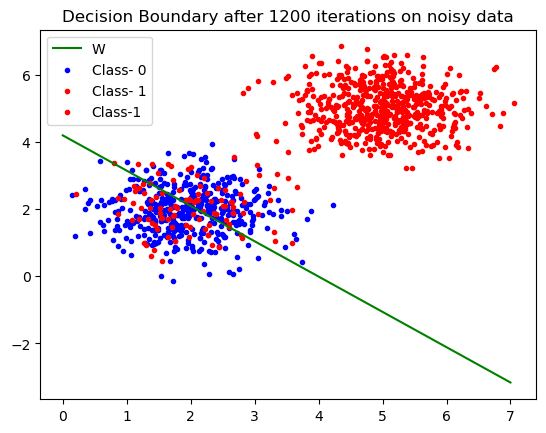

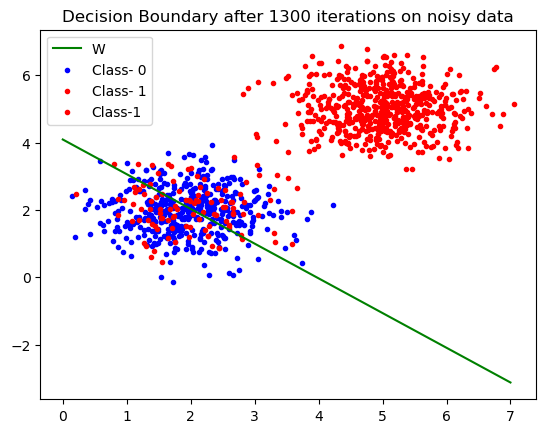

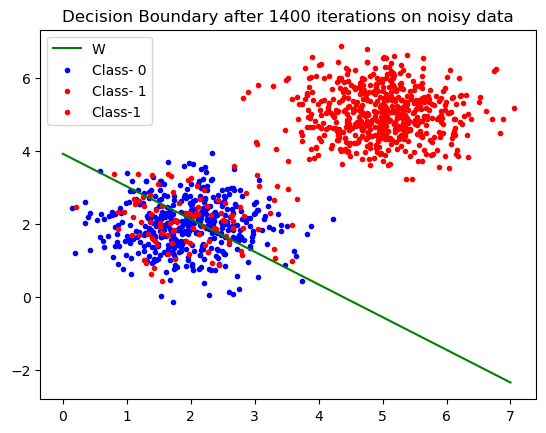

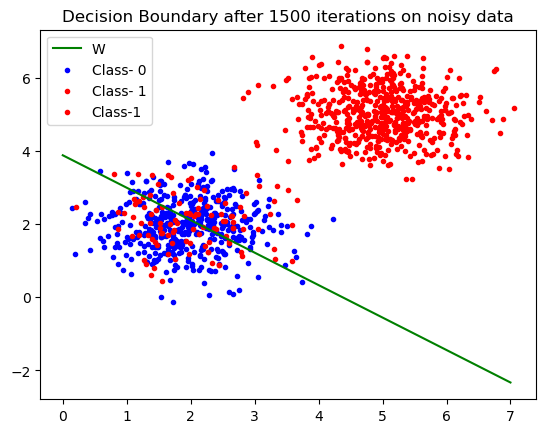

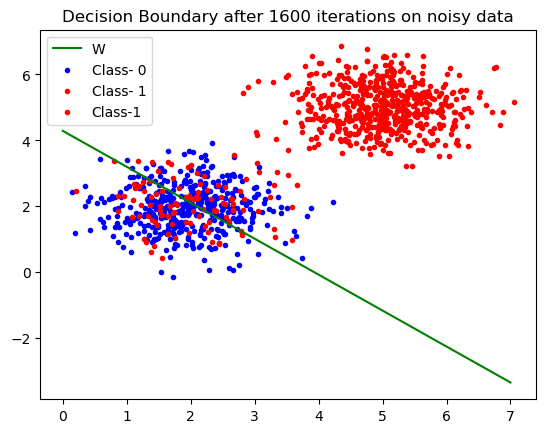

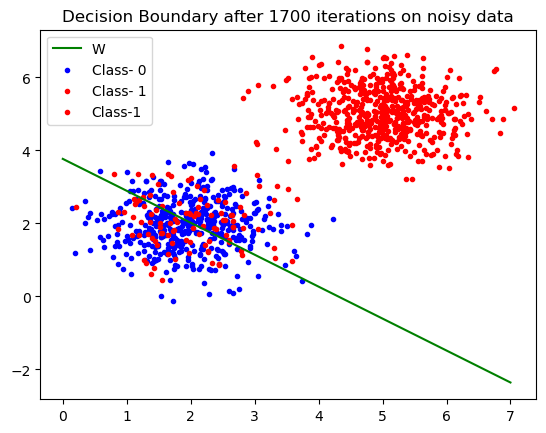

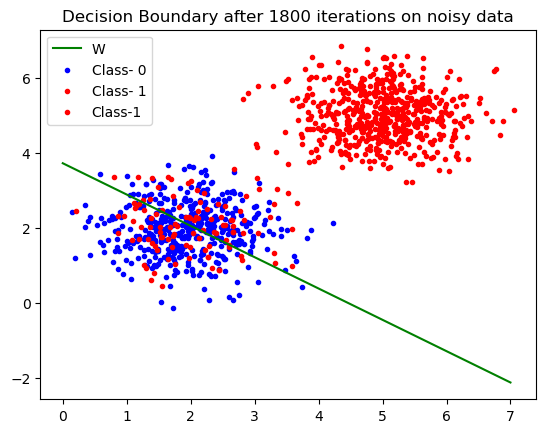

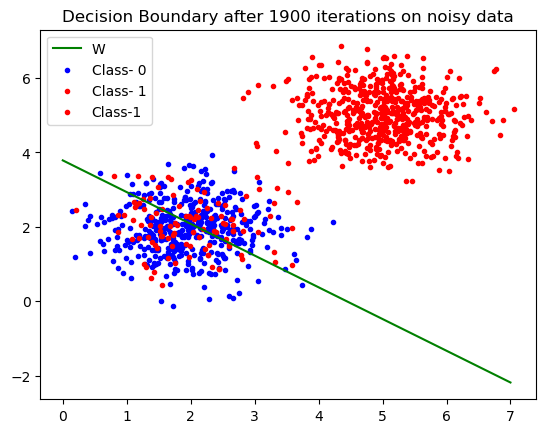

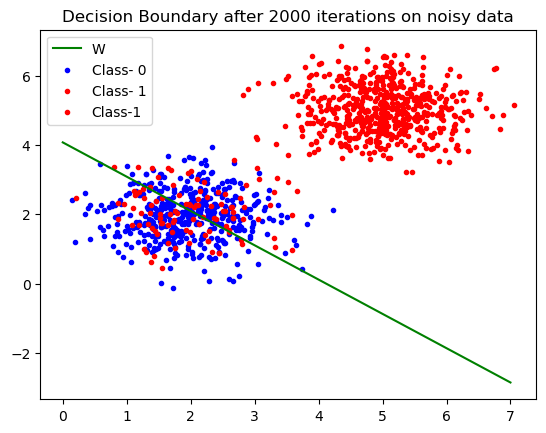

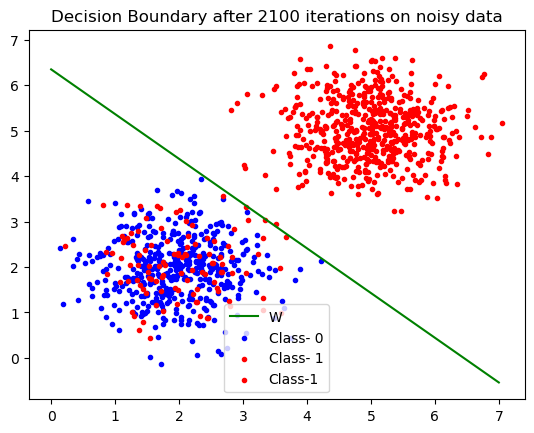

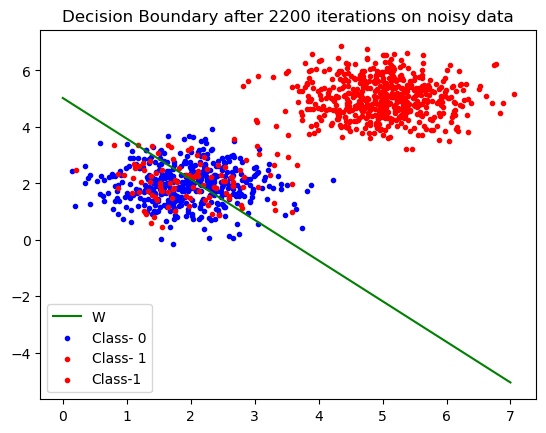

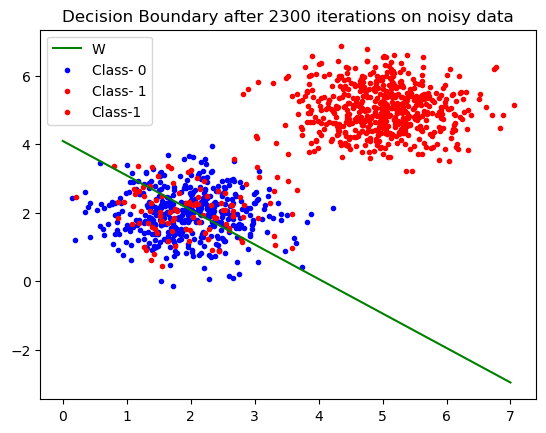

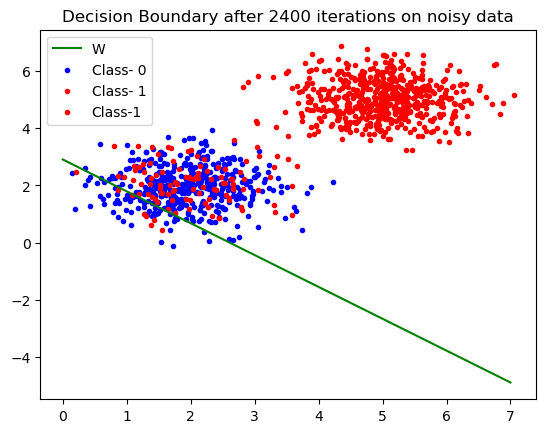

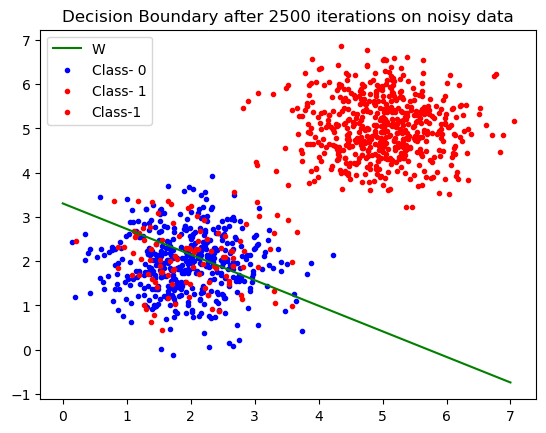

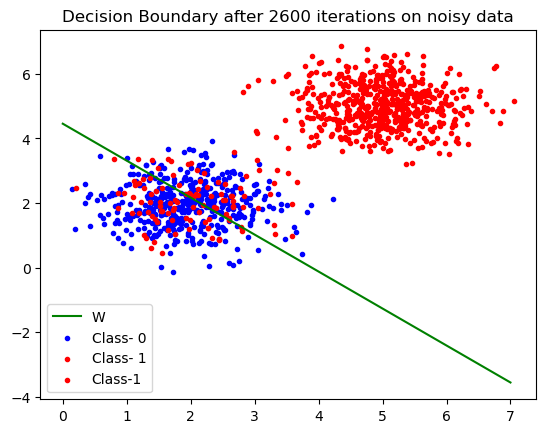

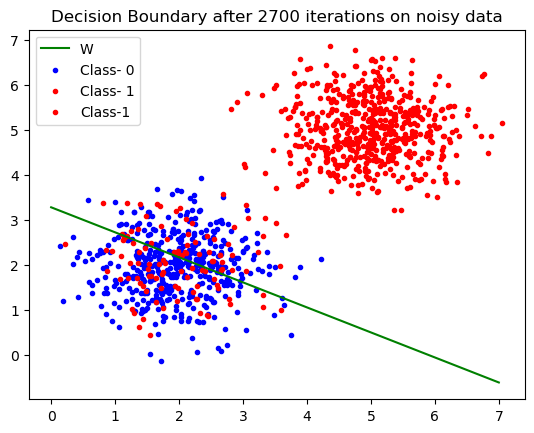

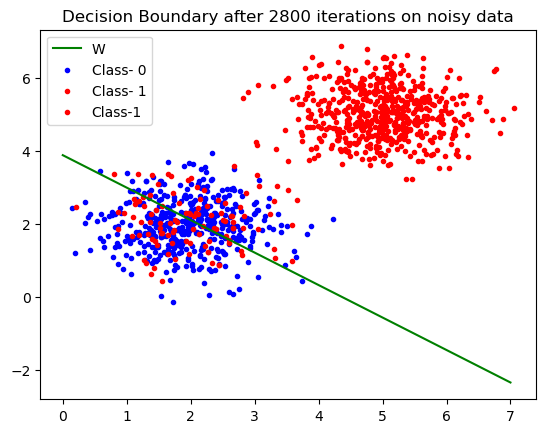

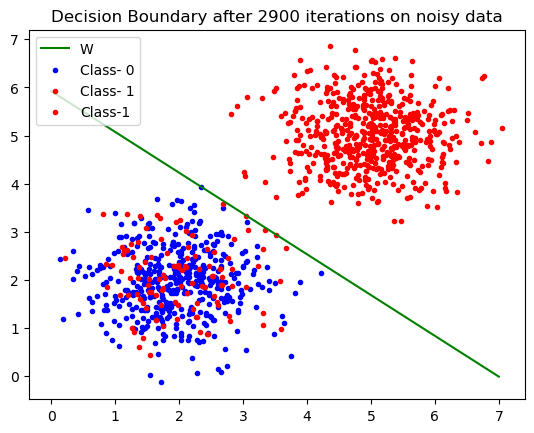

In [ ]:
# plot the data and W after training
x = np.linspace(0,7,100)
for i in range(len(iterations)):
    W = W_noise[i]
    y = -(W[0]/W[1])*x - (W[2]/W[1]) 
    plt.plot(x, y, '-g', label='W')
    plt.title(f"Decision Boundary after {iterations[i]} iterations on noisy data")
    plt.scatter(X[n:int(nP/2),0],X[n:int(nP/2),1],label="Class- 0",color="blue",marker=".")
    plt.scatter(X[int(nP/2):,0],X[int(nP/2):,1],label="Class- 1",color="red",marker=".")
    plt.scatter(X[:n,0],X[:n,1],label="Class-1",color="red",marker=".")
    plt.legend()
    plt.show()

# 2. Gradient Descent with loss appropriate loss function named Log Loss


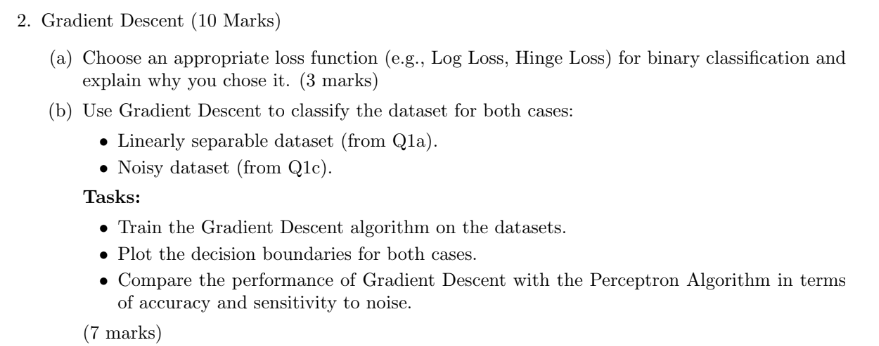


### Q) Why am i chosing log loss?

- log loss function is suitable for binary classification as it provides a probabilistic framework. It outputs the probability that a given instance belongs to the positive class,given 10% misclassification noisy data, log loss is particularly penalizing incorrect predictions.
- If a model predicts a high probability for the wrong class, the log loss will increase sharply, effectively pushing the model to adjust its parameters to make more accurate predictions.
- It a continuous and differentiable, which is essential for optimization algorithms (like gradient descent)


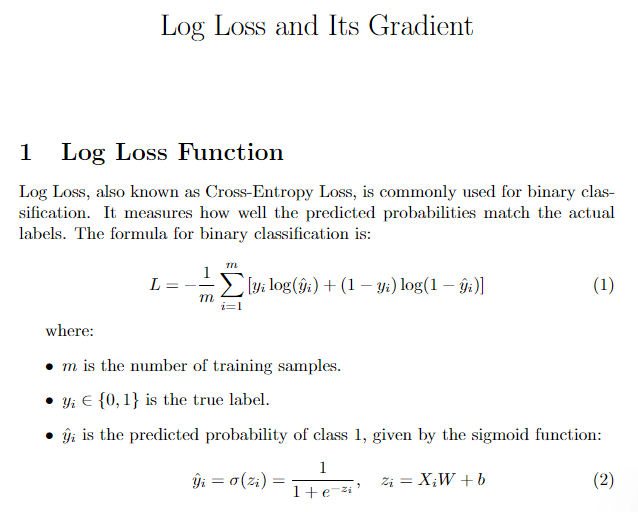
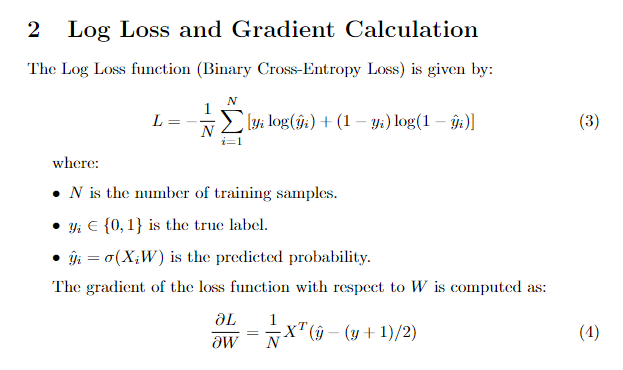
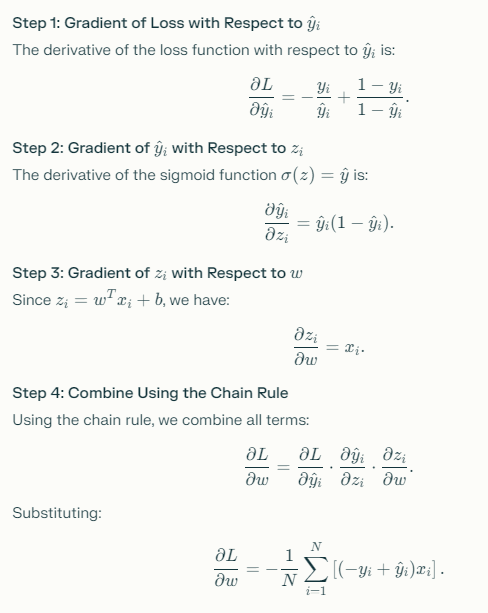


In [20]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))  

def calculate_gradient(X, y, w):  
    N = len(X)  
    y_pred = sigmoid(X @ w)  
    loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))  #1e-9 stability by avoiding undefined behavior when like log(0)
    dw = (1 / N) * X.T @ (y_pred - y)  
    return loss, dw  

def gradient_descent(X, y, iterations, lr=0.1):  
    w = np.zeros(X.shape[1])  # Initialize weights to zero  
    loss = -1  
    for epoch in range(iterations):  
        loss, dw = calculate_gradient(X, y, w)  
        w -= lr * dw  
    return w, loss

### 2.b.i) Linearly Separable dataset


In [22]:
# Y2 is linearly separable dataset and Y2_noise will have 10% flipped label
Y2 = Y.copy() 
Y2[:int(nP//2)] = 0 # changing label from -1 to 0
Y2_noise = Y2.copy()
n = int(0.1*len(X)) # number of flipped rows
Y2_noise[:n] = np.ones(n)


Iteration: 2900, Loss: 0.039066261709705894

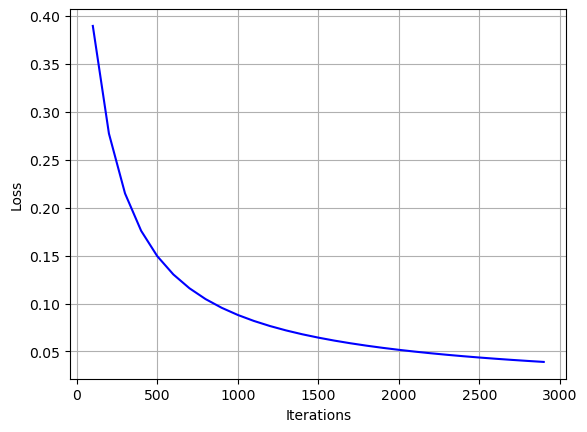

In [23]:
W2 = []
losses = []
for iter in iterations:
    w, loss = gradient_descent(X, Y2, iter, lr=0.1)
    print(f"\rIteration: {iter}, Loss: {loss}", end="")
    losses.append(loss)
    W2.append(w)
plt.plot(iterations,losses,color="b")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

#### Finding number of misclassified data points when using log-loss fnx and comparing the results with plots


In [52]:
misClassify2 = []  
for i in range(len(W2)):  
    n_misClassify = 0  
    w=W2[i]
    for j in range(len(X)):  
        s_i = w.dot(X[j])  
        pred = sigmoid(s_i)  
        pred_class = 1 if pred >= 0.5 else 0  
        if Y2[j] != pred_class:  
            n_misClassify += 1  
    misClassify2.append(n_misClassify)  
iter_min_misclassified2 = iterations[np.argmin(misClassify2)]

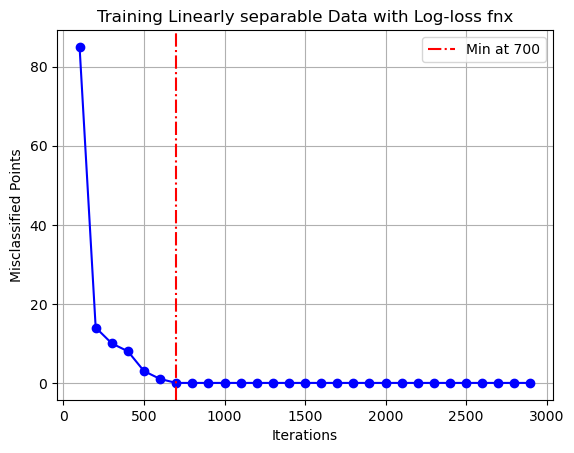

In [54]:
plt.plot(iterations, misClassify2, color="b", marker="o")
plt.xlabel("Iterations")
plt.ylabel("Misclassified Points")
iter_min_misclassified = iterations[misClassify2.index(min(misClassify2))]
plt.axvline(x=iter_min_misclassified, color='r', linestyle='-.', label=f'Min at {iter_min_misclassified}')
plt.title("Training Linearly separable Data with Log-loss fnx")
plt.grid()
plt.legend()
plt.show()


- Observations: Convergence occuring on noisy datasets when using log-loss fnx


Loss after 100 iterations: 0.3895552478250429
Number of misclassified points after 100 iterations: 85


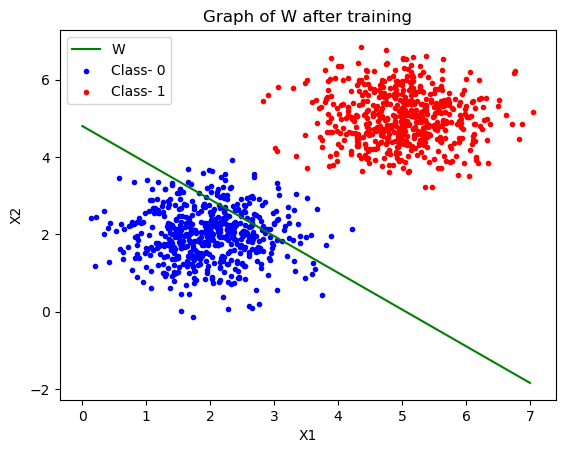

Loss after 200 iterations: 0.2772716699681655
Number of misclassified points after 200 iterations: 14


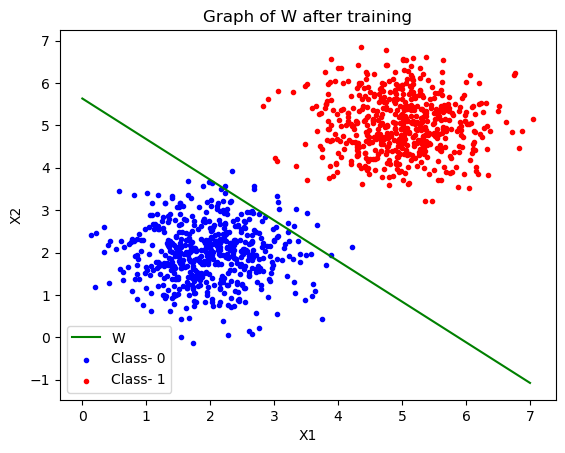

Loss after 300 iterations: 0.2148173771858993
Number of misclassified points after 300 iterations: 10


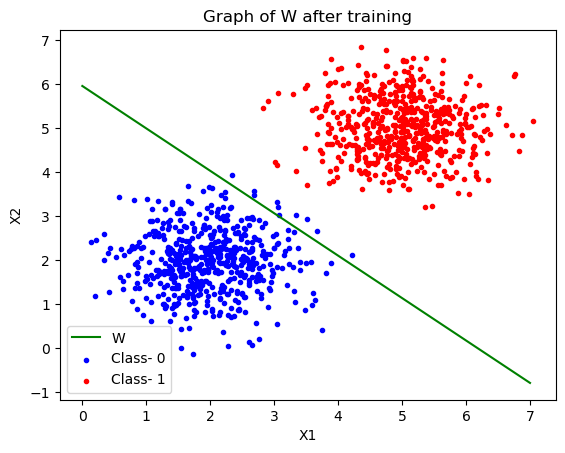

Loss after 400 iterations: 0.17585373853580522
Number of misclassified points after 400 iterations: 8


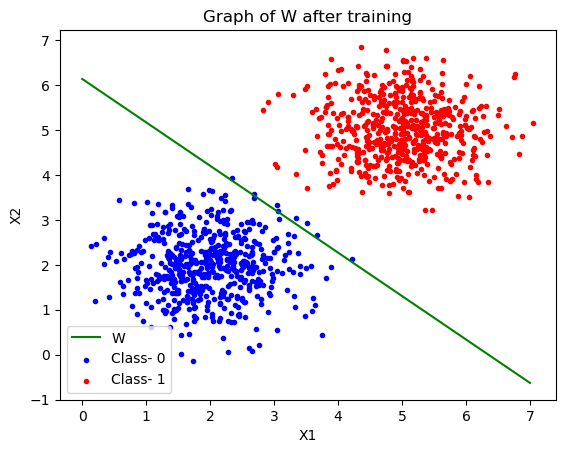

Loss after 500 iterations: 0.14940767779122763
Number of misclassified points after 500 iterations: 3


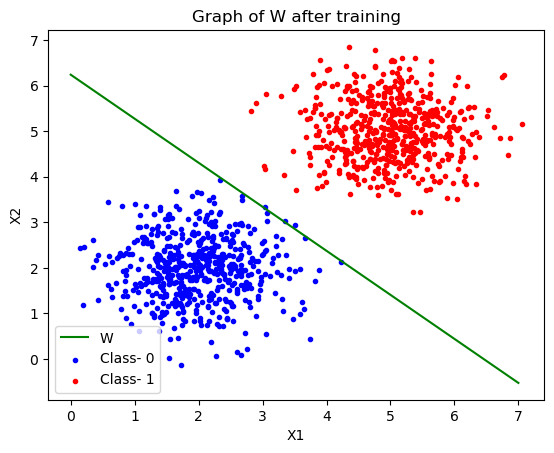

Loss after 600 iterations: 0.13032186544315327
Number of misclassified points after 600 iterations: 1


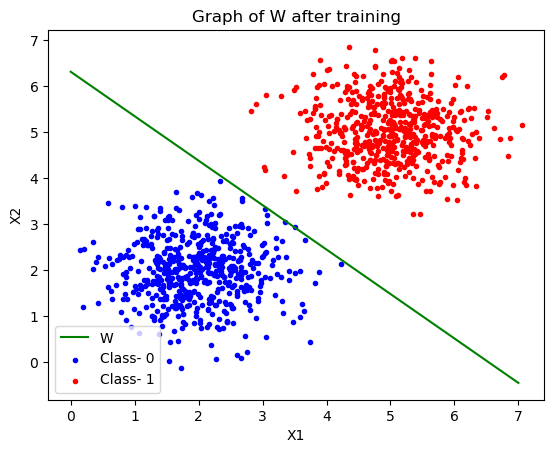

Loss after 700 iterations: 0.11590278694571787
Number of misclassified points after 700 iterations: 0


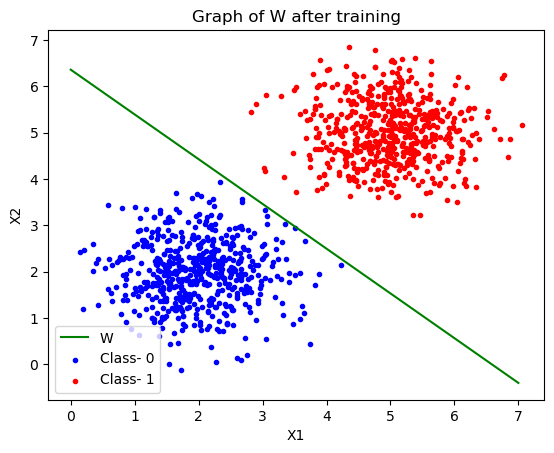

Loss after 800 iterations: 0.10462000802076032
Number of misclassified points after 800 iterations: 0


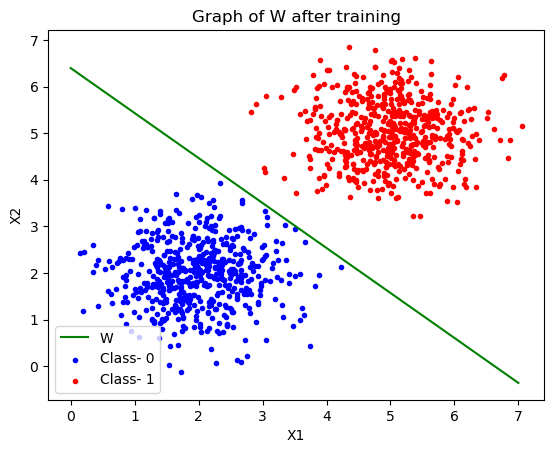

Loss after 900 iterations: 0.09554381012898039
Number of misclassified points after 900 iterations: 0


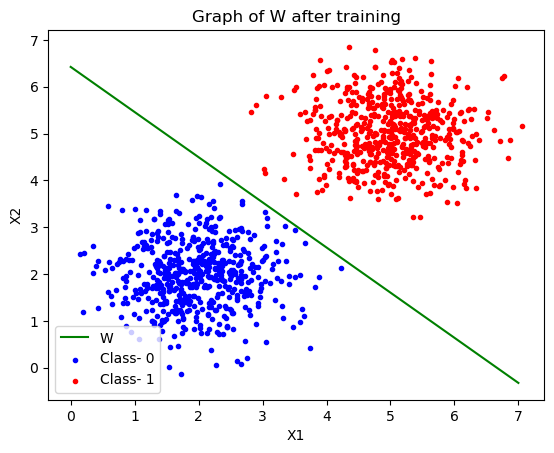

Loss after 1000 iterations: 0.08807825549047622
Number of misclassified points after 1000 iterations: 0


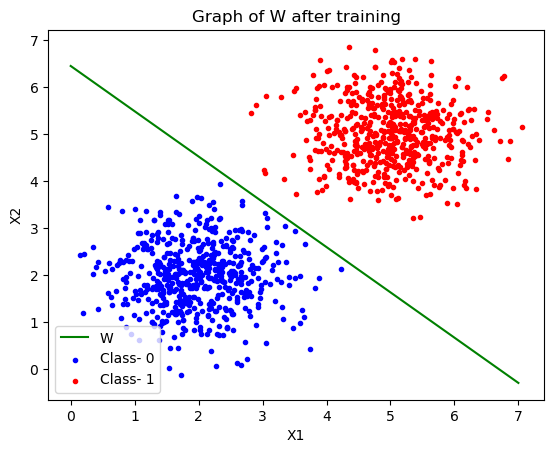

Loss after 1100 iterations: 0.08182426585372572
Number of misclassified points after 1100 iterations: 0


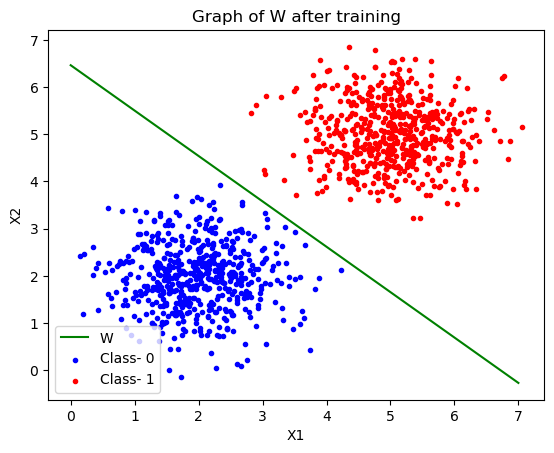

Loss after 1200 iterations: 0.07650473017899559
Number of misclassified points after 1200 iterations: 0


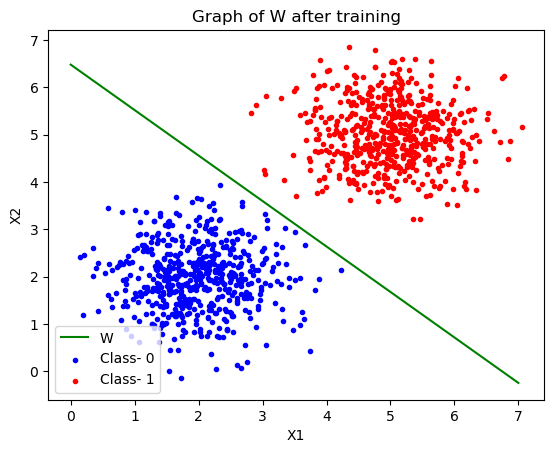

Loss after 1300 iterations: 0.07192128271567465
Number of misclassified points after 1300 iterations: 0


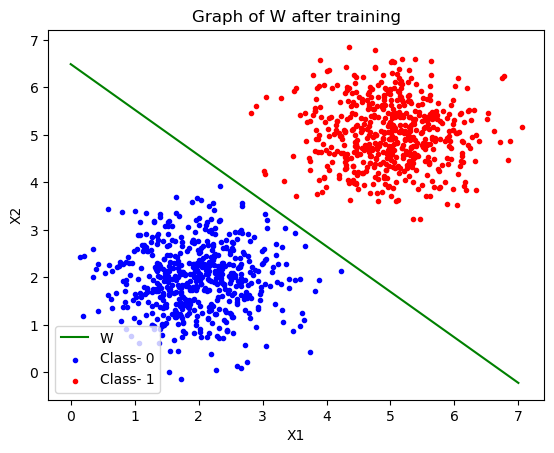

Loss after 1400 iterations: 0.06792820324954839
Number of misclassified points after 1400 iterations: 0


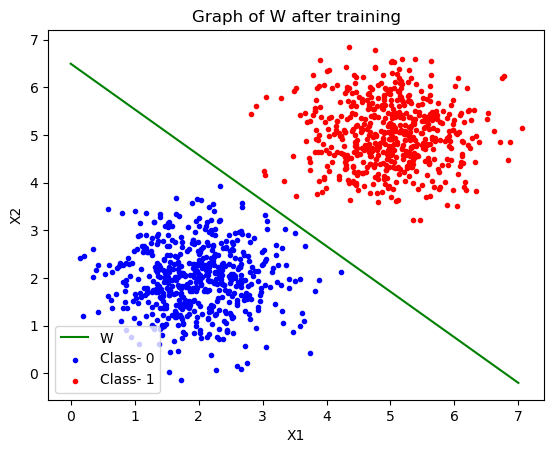

Loss after 1500 iterations: 0.06441603588583739
Number of misclassified points after 1500 iterations: 0


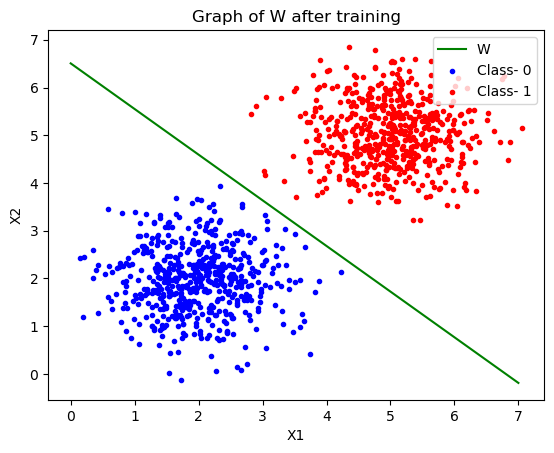

Loss after 1600 iterations: 0.06130095948895561
Number of misclassified points after 1600 iterations: 0


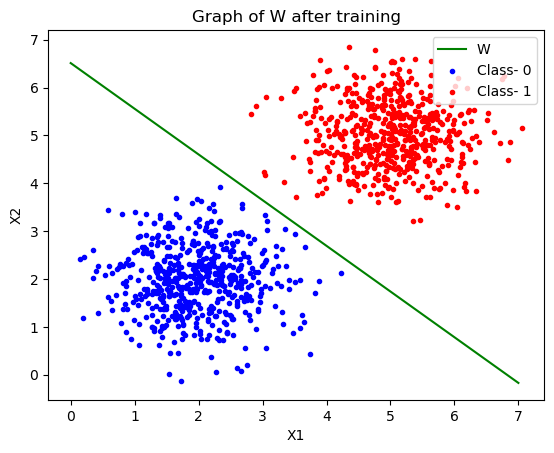

Loss after 1700 iterations: 0.05851768762344415
Number of misclassified points after 1700 iterations: 0


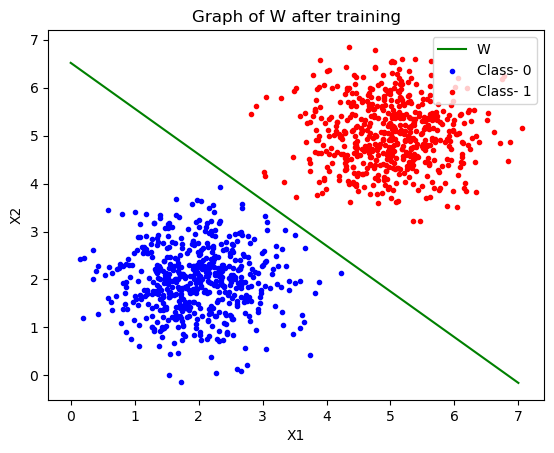

Loss after 1800 iterations: 0.056014604020161424
Number of misclassified points after 1800 iterations: 0


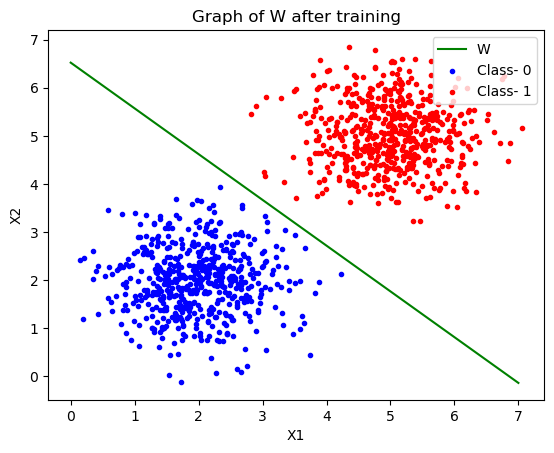

Loss after 1900 iterations: 0.05375035401419469
Number of misclassified points after 1900 iterations: 0


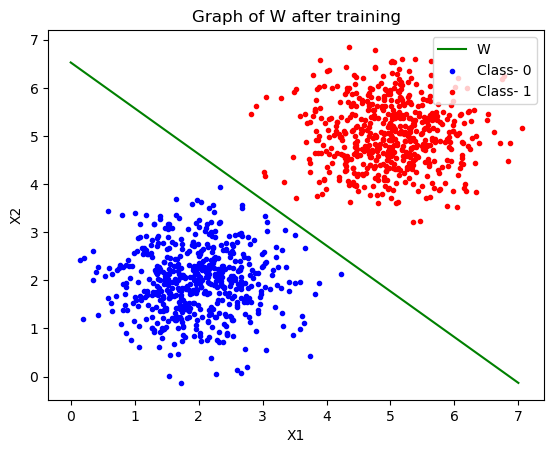

Loss after 2000 iterations: 0.0516914079812426
Number of misclassified points after 2000 iterations: 0


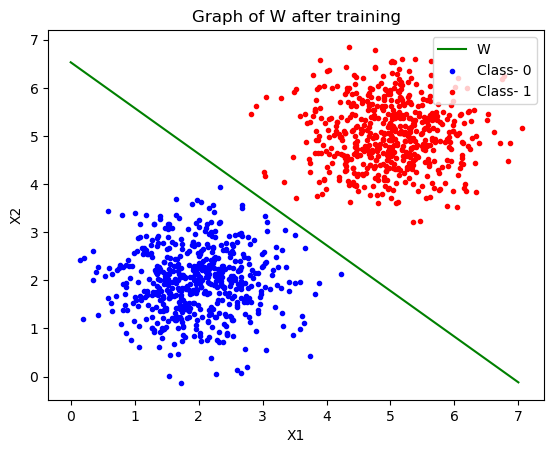

Loss after 2100 iterations: 0.04981028815861092
Number of misclassified points after 2100 iterations: 0


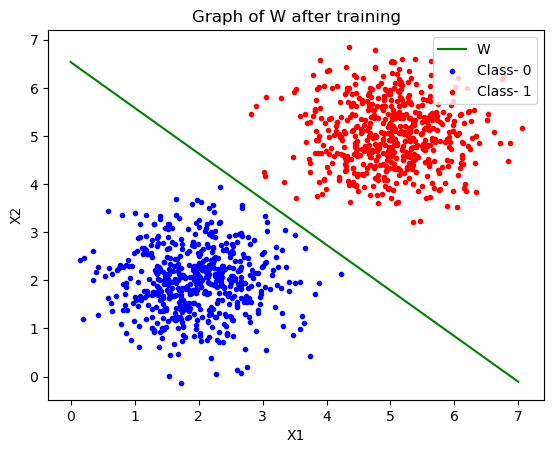

Loss after 2200 iterations: 0.04808425728725234
Number of misclassified points after 2200 iterations: 0


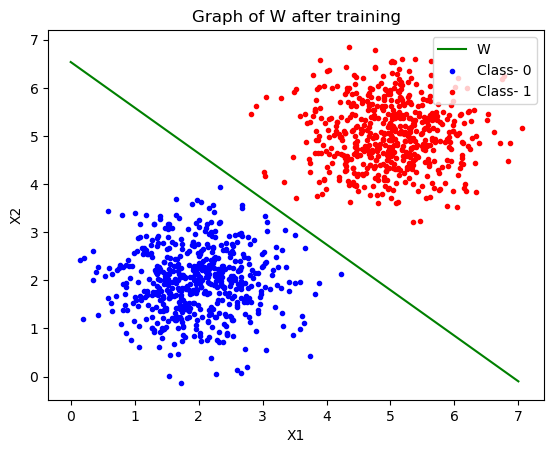

Loss after 2300 iterations: 0.04649433455886341
Number of misclassified points after 2300 iterations: 0


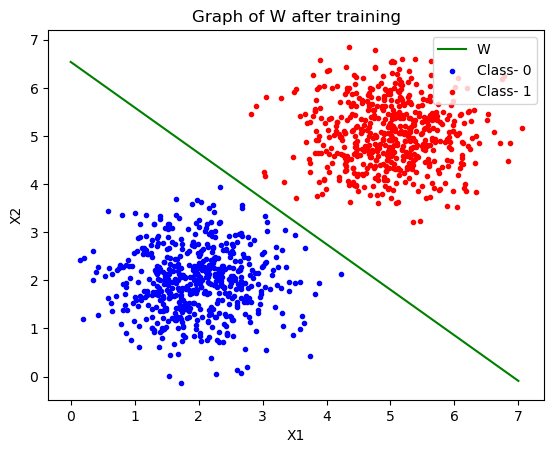

Loss after 2400 iterations: 0.045024547328302425
Number of misclassified points after 2400 iterations: 0


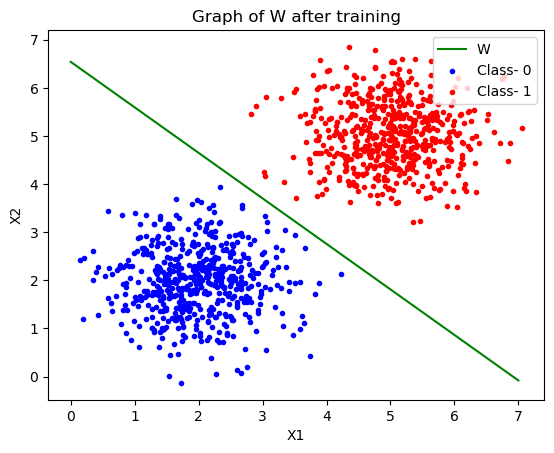

Loss after 2500 iterations: 0.04366135518273167
Number of misclassified points after 2500 iterations: 0


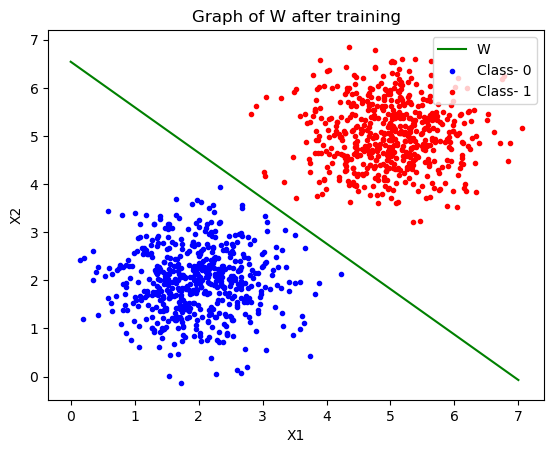

Loss after 2600 iterations: 0.04239320172812577
Number of misclassified points after 2600 iterations: 0


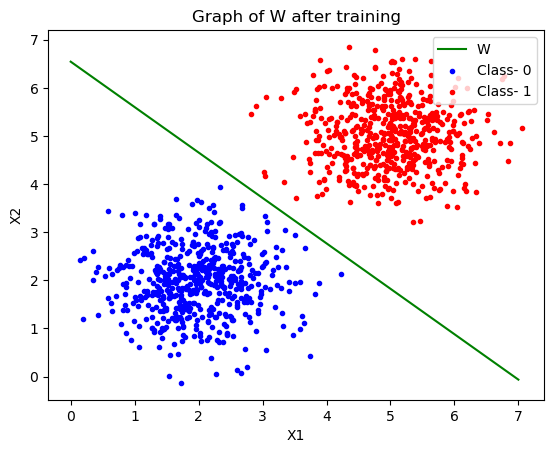

Loss after 2700 iterations: 0.04121016219752479
Number of misclassified points after 2700 iterations: 0


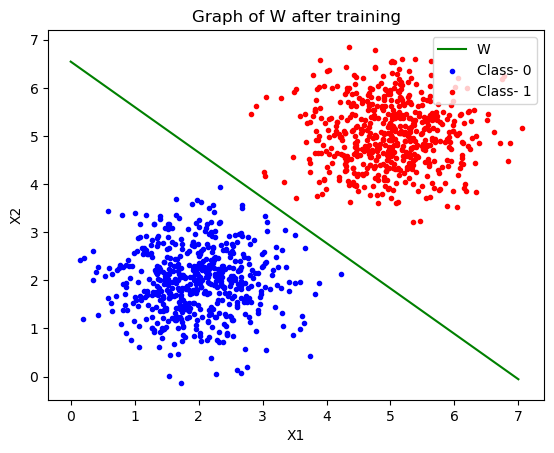

Loss after 2800 iterations: 0.040103663777958994
Number of misclassified points after 2800 iterations: 0


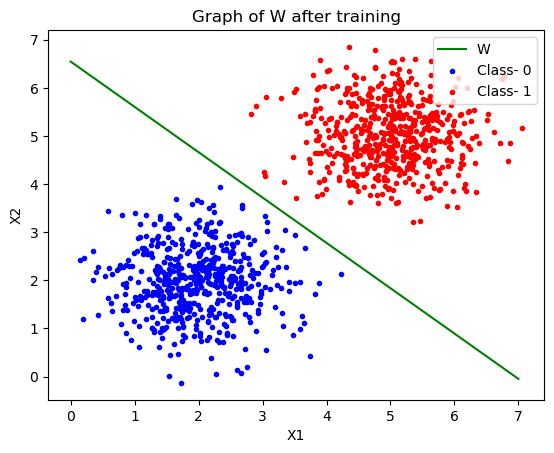

Loss after 2900 iterations: 0.03906626170970589
Number of misclassified points after 2900 iterations: 0


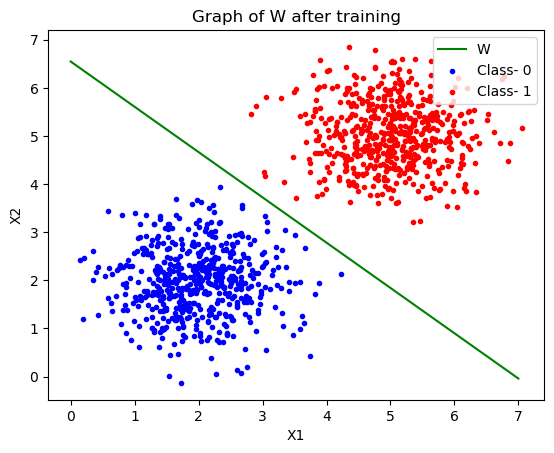

In [57]:
for i in range(len(W2)):
    x = np.linspace(0,7,5000)
    w = W2[i]
    y = -(w[0]/w[1])*x - (w[2]/w[1])
    print(f"Loss after {iterations[i]} iterations: {losses[i]}")
    print(f"Number of misclassified points after {iterations[i]} iterations: {misClassify2[i]}")
    plt.plot(x, y, '-g', label='W')
    plt.title(f"Decision Boundary after {iterations[i]} iterations using log-loss on LSD")
    plt.title('Graph of W after training')
    plt.legend(loc='upper left')
    plt.scatter(X[:int(nP/2),0],X[:int(nP/2),1],label="Class- 0",color="blue",marker=".")
    plt.scatter(X[int(nP/2):,0],X[int(nP/2):,1],label="Class- 1",color="red",marker=".")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

### 2.b.ii) Noisy dataset


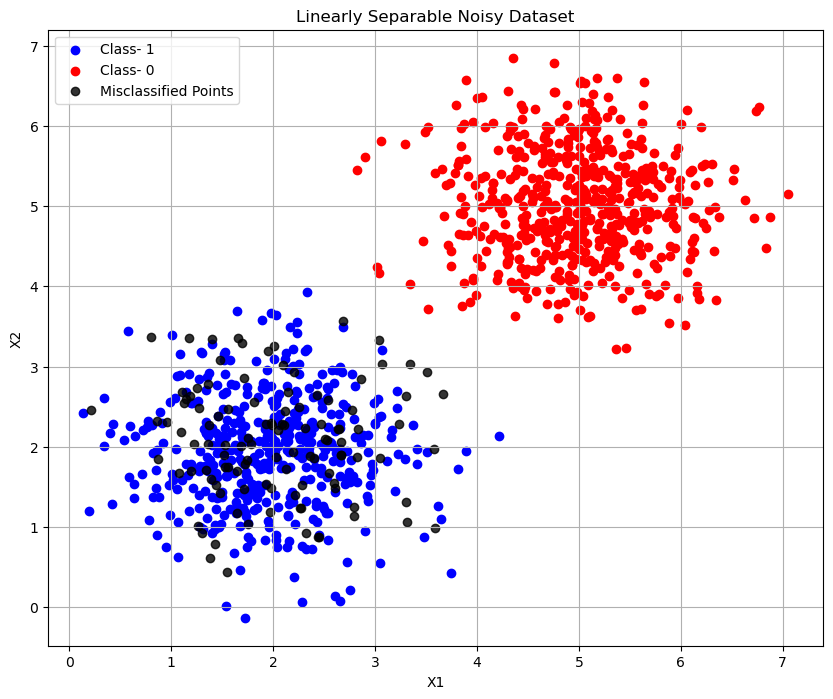

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(X[n:int(nP/2),0],X[n:int(nP/2),1],label="Class- 1",color="blue",marker="o")
plt.scatter(X[int(nP/2):,0],X[int(nP/2):,1],label="Class- 0",color="red",marker="o")
plt.scatter(X[:n,0],X[:n,1],label="Misclassified Points",color="black",alpha=0.8,marker="o")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Noisy Dataset')
plt.legend()
plt.grid(True)
plt.show()

### 2.b.iii) Compare the performance of Gradient Descent with the Perceptron Algorithm in terms of accuracy and sensitivity to noise.


In [61]:
W2_noise=[]
losses_noise = []
for iter in iterations:
    w,loss = gradient_descent(X,Y2_noise,iter,lr=0.1)
    losses_noise.append(loss)
    W2_noise.append(w)
    print(f"Iteration {iter} is completed",end="\r")

In [62]:
misClassify2_noise = []  
n = len(W2_noise)
for i in range(len(W2_noise)):  
    n_misClassify = 0  
    w=W2_noise[i]
    for j in range(len(X)):  
        s_i = w.dot(X[j])  
        pred = sigmoid(s_i)  
        pred_class = 1 if pred >= 0.5 else 0  
        if Y2[j] != pred_class:  
            n_misClassify += 1  
    misClassify2_noise.append(n_misClassify)  

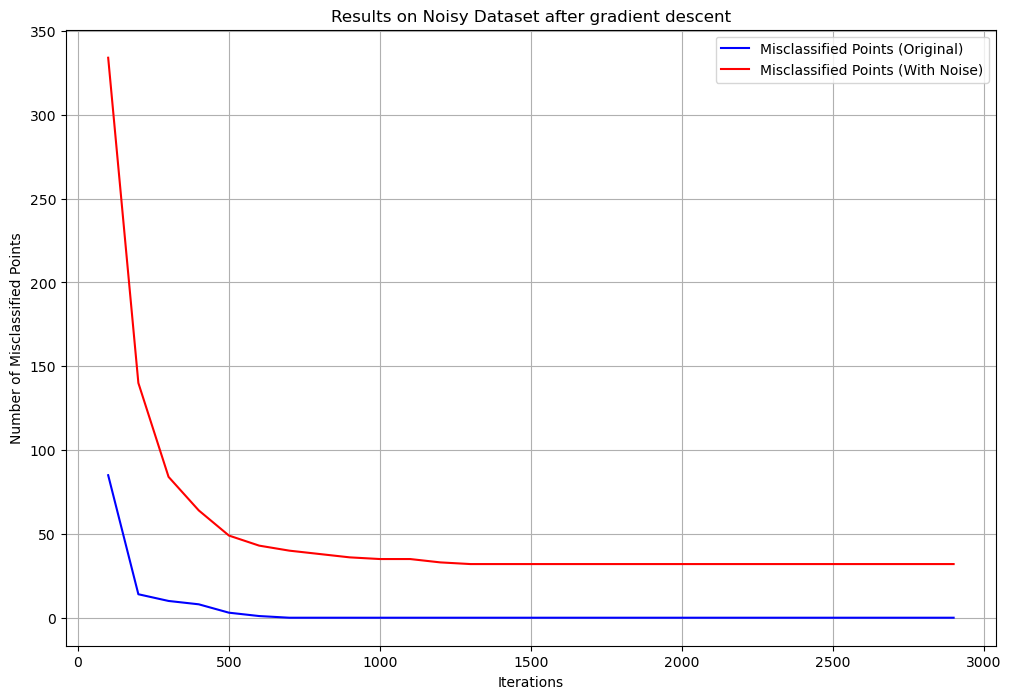

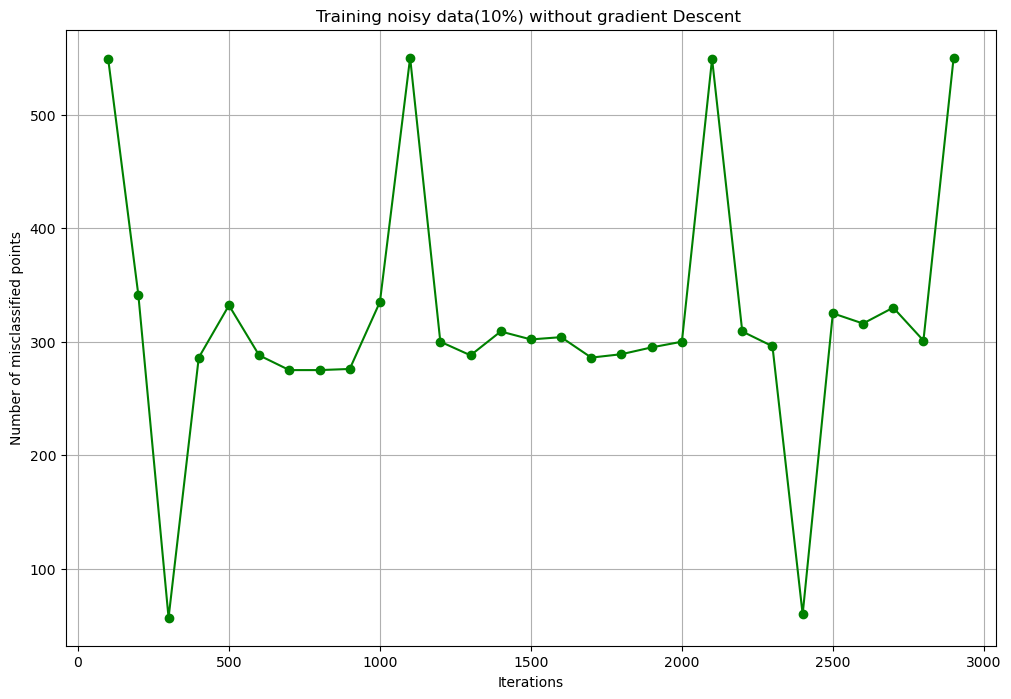

In [63]:
plt.figure(figsize=(12,8))
plt.plot(iterations, misClassify2, label='Misclassified Points (Original)', color='blue')  
plt.plot(iterations, misClassify2_noise, label='Misclassified Points (With Noise)', color='red')  
plt.xlabel("Iterations")
plt.ylabel("Number of Misclassified Points")
plt.title("Results on Noisy Dataset after gradient descent")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(iterations,misClassify1_noise , color="g", marker="o")
plt.xlabel("Iterations")
plt.ylabel("Number of misclassified points")
plt.title("Training noisy data(10%) without gradient Descent ")
plt.grid()
plt.show()

Loss after 100 iterations: 0.3895552478250429
Loss after 100 Misclassified POints: 334


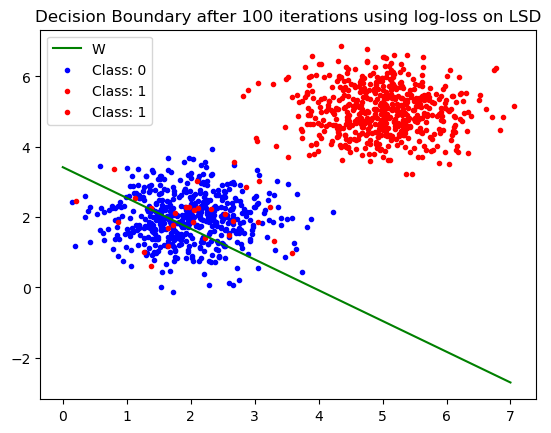

Loss after 200 iterations: 0.2772716699681655
Loss after 200 Misclassified POints: 140


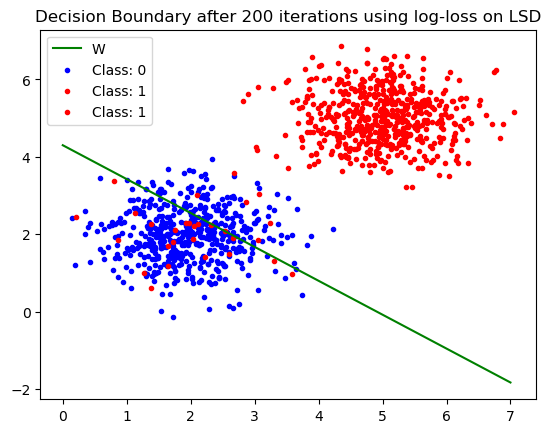

Loss after 300 iterations: 0.2148173771858993
Loss after 300 Misclassified POints: 84


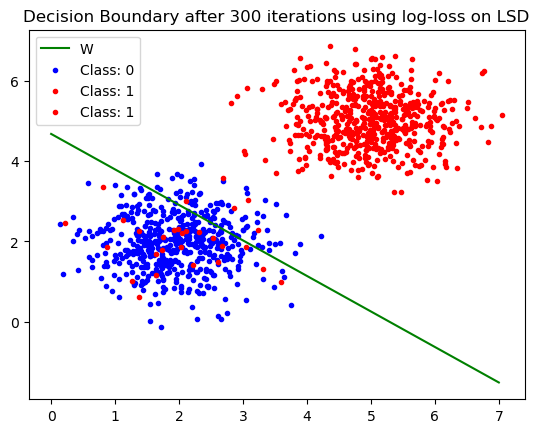

Loss after 400 iterations: 0.17585373853580522
Loss after 400 Misclassified POints: 64


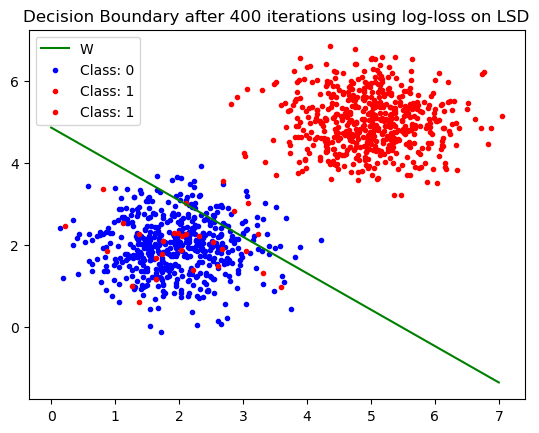

Loss after 500 iterations: 0.14940767779122763
Loss after 500 Misclassified POints: 49


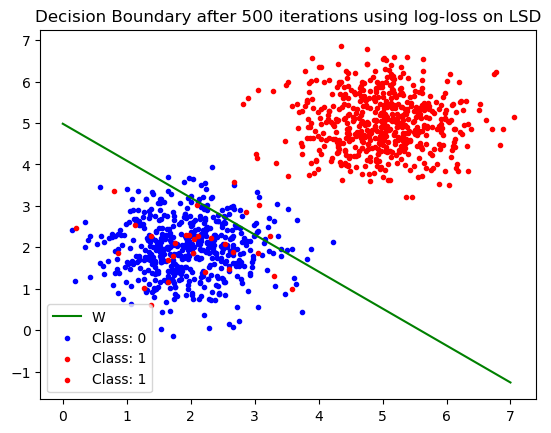

Loss after 600 iterations: 0.13032186544315327
Loss after 600 Misclassified POints: 43


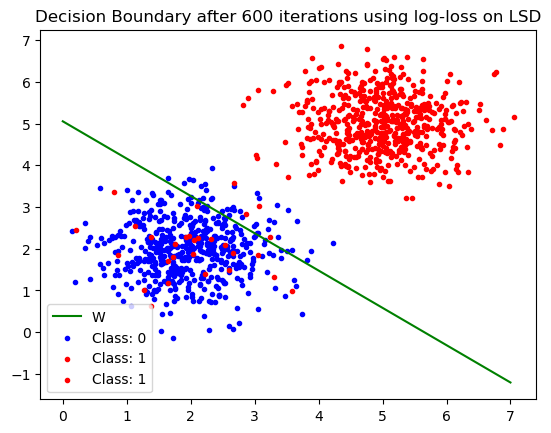

Loss after 700 iterations: 0.11590278694571787
Loss after 700 Misclassified POints: 40


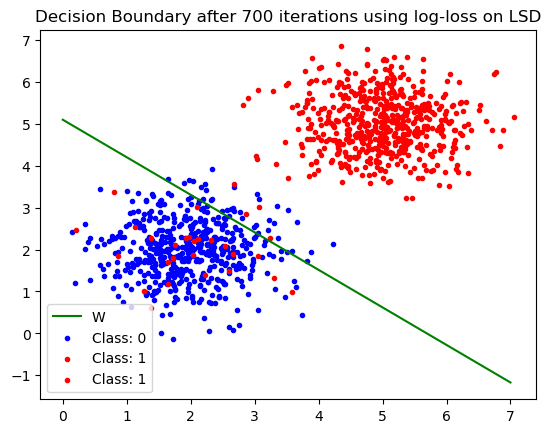

Loss after 800 iterations: 0.10462000802076032
Loss after 800 Misclassified POints: 38


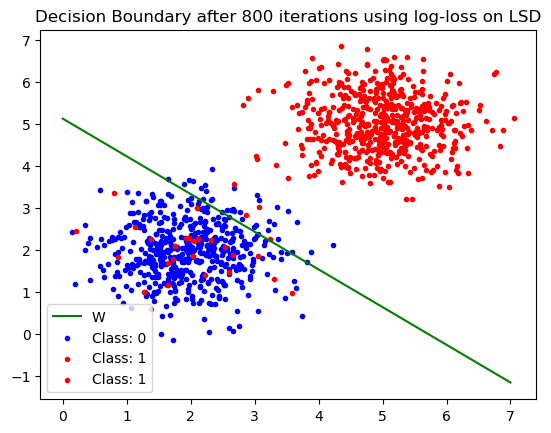

Loss after 900 iterations: 0.09554381012898039
Loss after 900 Misclassified POints: 36


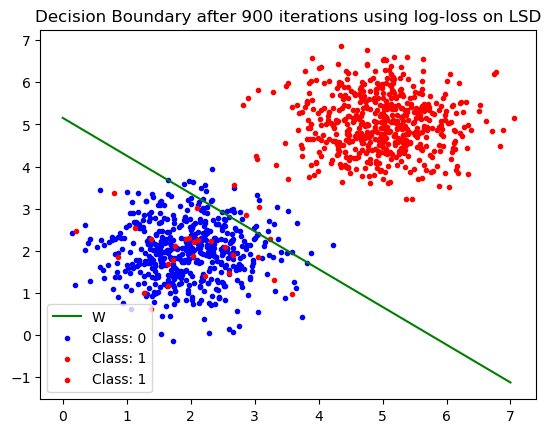

Loss after 1000 iterations: 0.08807825549047622
Loss after 1000 Misclassified POints: 35


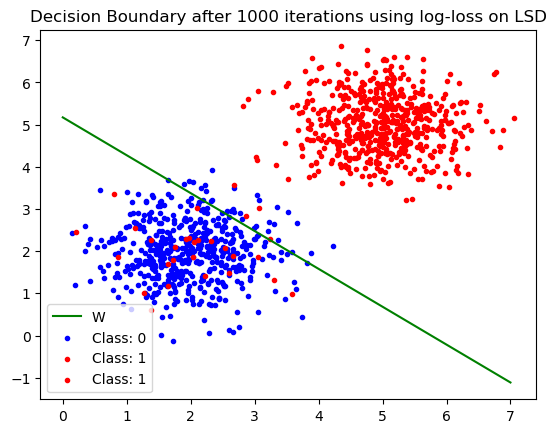

Loss after 1100 iterations: 0.08182426585372572
Loss after 1100 Misclassified POints: 35


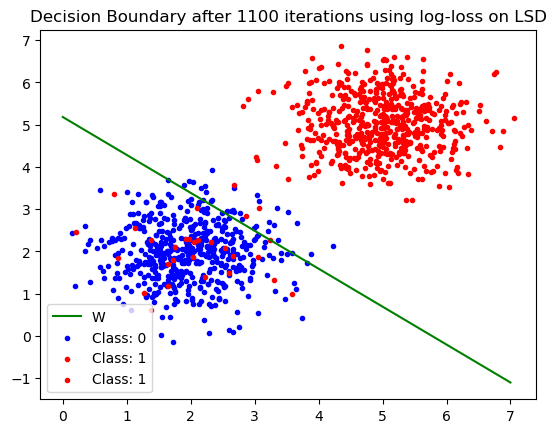

Loss after 1200 iterations: 0.07650473017899559
Loss after 1200 Misclassified POints: 33


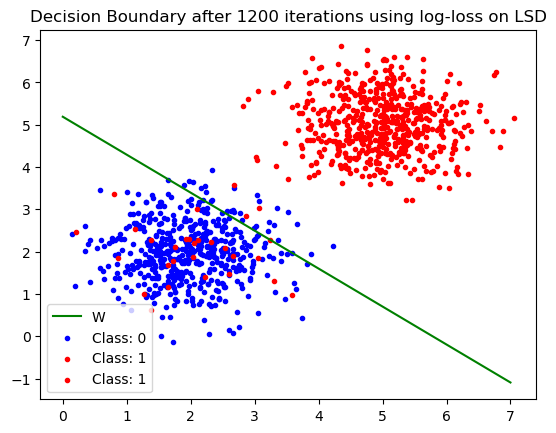

Loss after 1300 iterations: 0.07192128271567465
Loss after 1300 Misclassified POints: 32


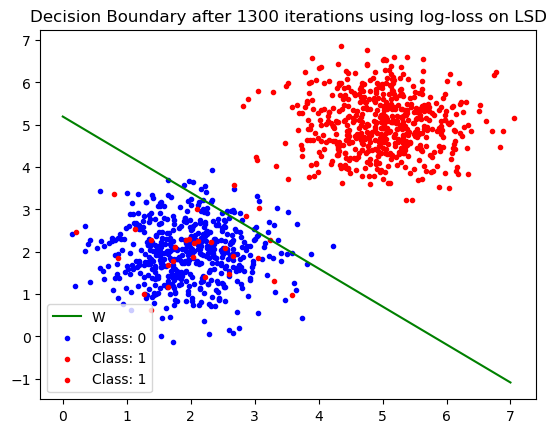

Loss after 1400 iterations: 0.06792820324954839
Loss after 1400 Misclassified POints: 32


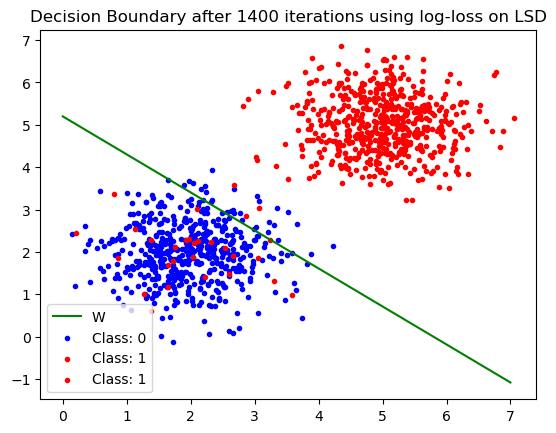

Loss after 1500 iterations: 0.06441603588583739
Loss after 1500 Misclassified POints: 32


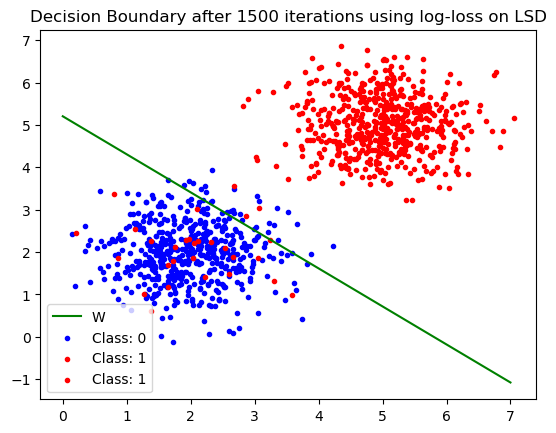

Loss after 1600 iterations: 0.06130095948895561
Loss after 1600 Misclassified POints: 32


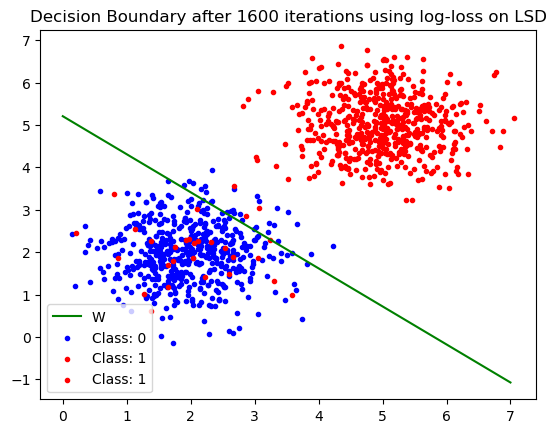

Loss after 1700 iterations: 0.05851768762344415
Loss after 1700 Misclassified POints: 32


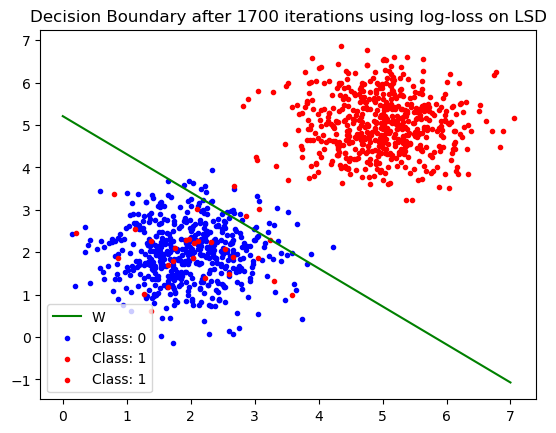

Loss after 1800 iterations: 0.056014604020161424
Loss after 1800 Misclassified POints: 32


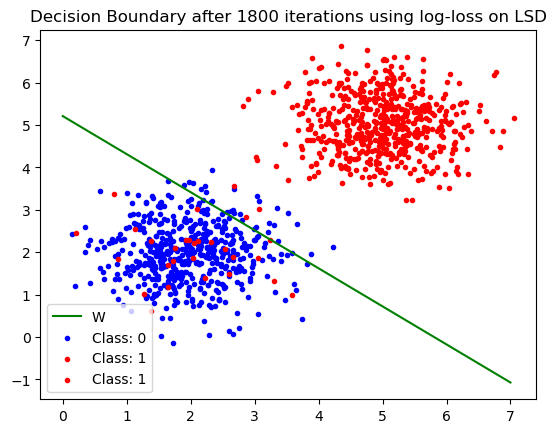

Loss after 1900 iterations: 0.05375035401419469
Loss after 1900 Misclassified POints: 32


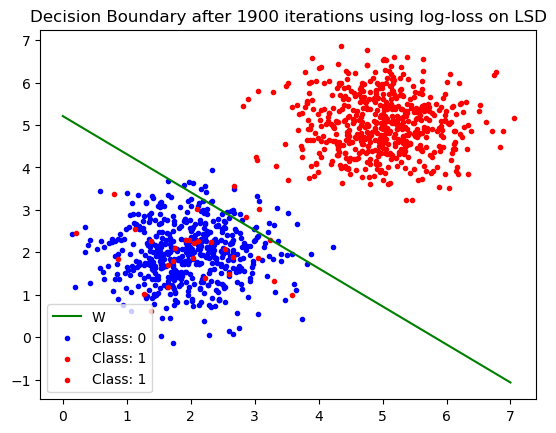

Loss after 2000 iterations: 0.0516914079812426
Loss after 2000 Misclassified POints: 32


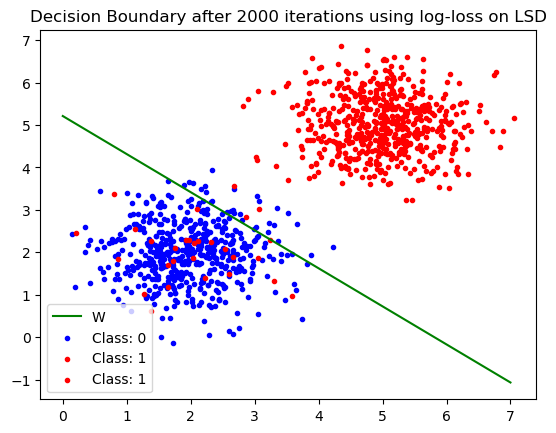

Loss after 2100 iterations: 0.04981028815861092
Loss after 2100 Misclassified POints: 32


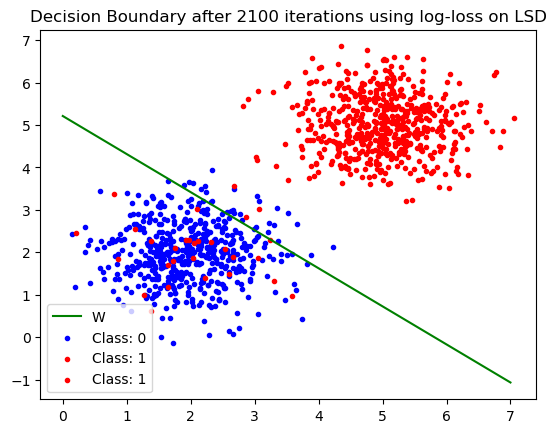

Loss after 2200 iterations: 0.04808425728725234
Loss after 2200 Misclassified POints: 32


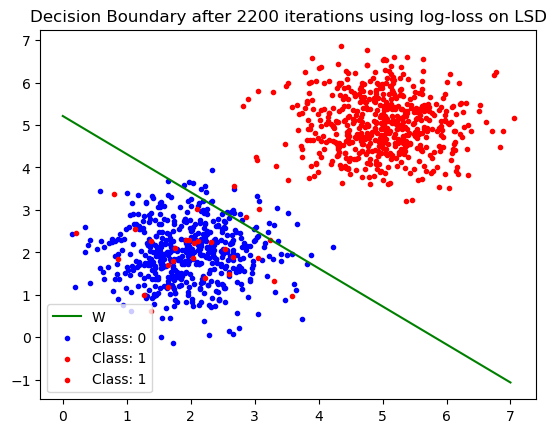

Loss after 2300 iterations: 0.04649433455886341
Loss after 2300 Misclassified POints: 32


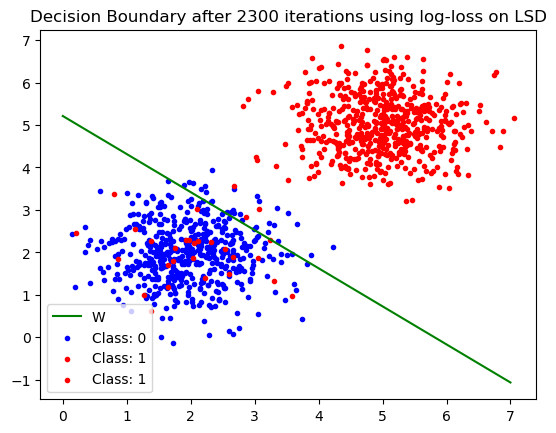

Loss after 2400 iterations: 0.045024547328302425
Loss after 2400 Misclassified POints: 32


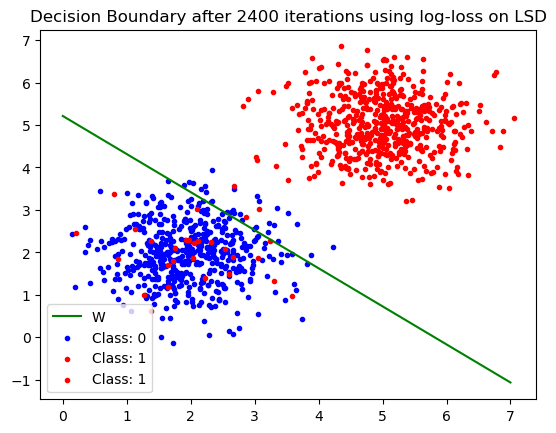

Loss after 2500 iterations: 0.04366135518273167
Loss after 2500 Misclassified POints: 32


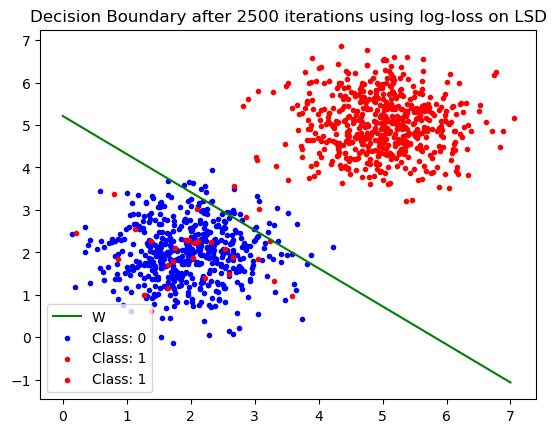

Loss after 2600 iterations: 0.04239320172812577
Loss after 2600 Misclassified POints: 32


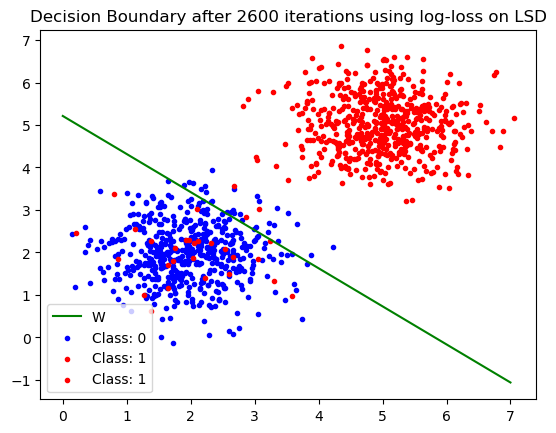

Loss after 2700 iterations: 0.04121016219752479
Loss after 2700 Misclassified POints: 32


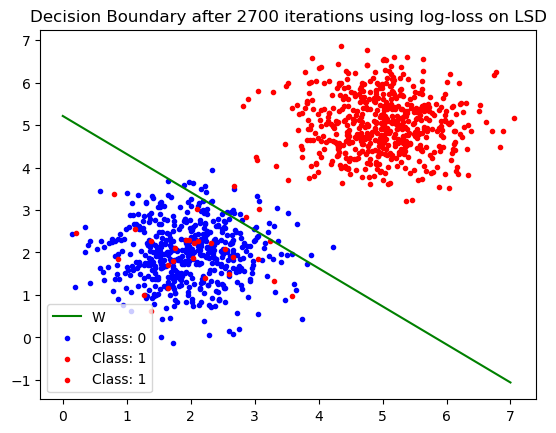

Loss after 2800 iterations: 0.040103663777958994
Loss after 2800 Misclassified POints: 32


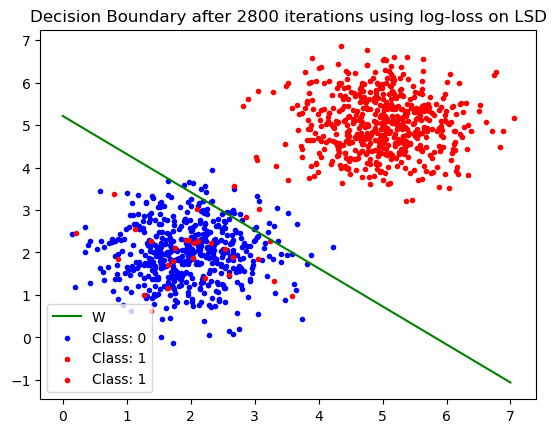

Loss after 2900 iterations: 0.03906626170970589
Loss after 2900 Misclassified POints: 32


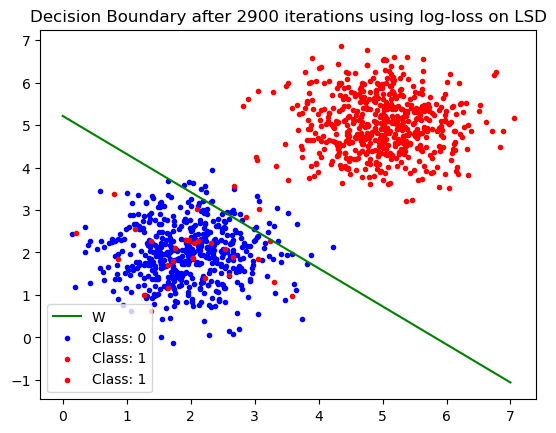

In [64]:
for i in range(len(W2)):
    w = W2_noise[i]
    y = -(w[0]/w[1])*x - (w[2]/w[1])
    print(f"Loss after {iterations[i]} iterations: {losses[i]}")
    print(f"Loss after {iterations[i]} Misclassified POints: {misClassify2_noise[i]}")
    plt.plot(x, y, '-g', label='W')
    plt.title(f"Decision Boundary after {iterations[i]} iterations using log-loss on LSD")
    plt.scatter(X[n:int(nP/2),0],X[n:int(nP/2),1],label="Class: 0",color="blue",marker=".")
    plt.scatter(X[int(nP/2):,0],X[int(nP/2):,1],label="Class: 1",color="red",marker=".")
    plt.scatter(X[:n,0],X[:n,1],label="Class: 1",color="red",marker=".")
    plt.legend()
    plt.show()

# 3)MLP with a single hidden layer


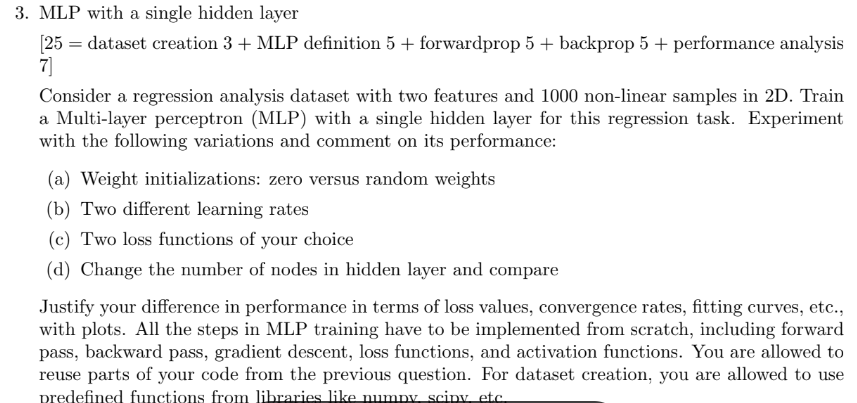


## Non linear Dataset creation


In [74]:
np.random.seed(0)
X = np.random.uniform(-2, 2, (1000, 2))  # Two features
y = np.sin(3 * X[:, 0]) + np.cos(3 * X[:, 1]) + np.random.normal(0, 0.1, 1000)  
y = y.reshape(-1, 1)

In [76]:
X[:5,:]

array([[ 0.19525402,  0.86075747],
       [ 0.4110535 ,  0.17953273],
       [-0.3053808 ,  0.58357645],
       [-0.24965115,  1.567092  ],
       [ 1.85465104, -0.46623392]])

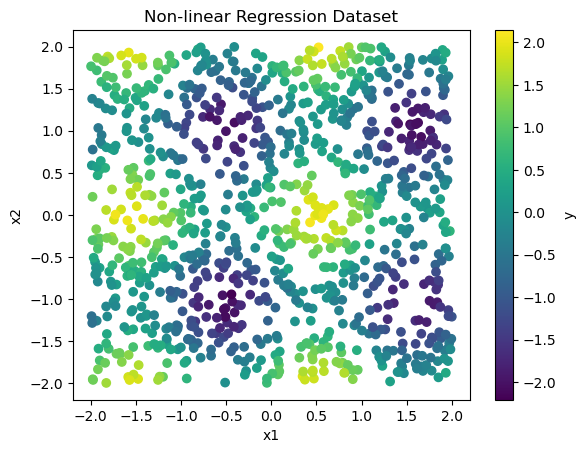

In [78]:
# Visualizing the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.colorbar(label='y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Non-linear Regression Dataset')
plt.show()

## Defining Activation and loss fnx and their derivative


In [81]:
# Activation functions and their derivatives
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoidal_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Loss functions and their derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mse_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.shape[0]

def mae_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mae_derivative(y_true, y_pred):
    return np.sign(y_pred - y_true) / y_true.shape[0]

##

Architectr

- Input Layer (2 nodes) --> Hidden Layer (N nodes) --> Output Layer (1 node)

## Explanation-

**MLP ** -> Initialize Weights (W1, W2) and biases (b1, b2) for the two layers(excluding input layer)

- _sizes_: A list specifying the number of nodes in each layer, e.g., [2,5,1] (2 input nodes, 5 hidden nodes, 1 output node).
- _weight_type_: Determines how weights are initialized (zero for all zeros or random for small random values).
- _lr_: Learning rate for gradient descent.
- _loss_fn_: Specifies the loss funct
  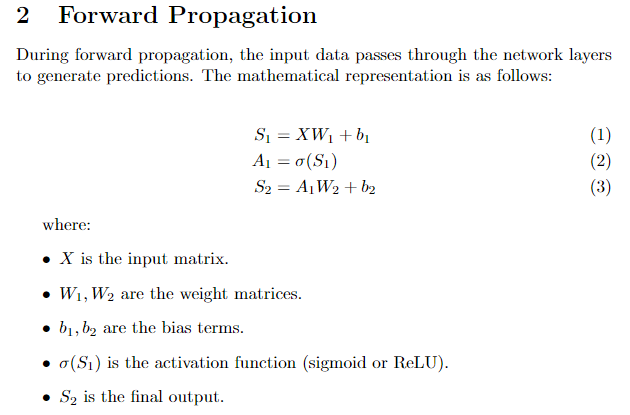
  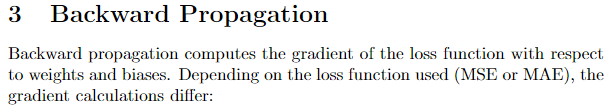
  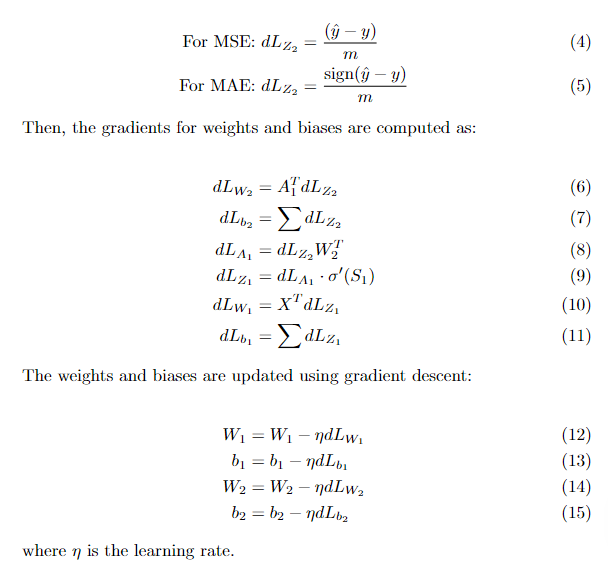


In [ ]:
class MLPRegressor:
    def __init__(self, sizes, weight_type='random', lr=0.1, loss_fn='mse'):
        self.lr = lr
        self.loss_fn = loss_fn
        self.num_layers = len(sizes)
        if weight_type == "zero":
            self.params = [np.zeros((i, j+1)) for i, j in zip(sizes[1:], sizes[:-1])]
        else:  # random initialization
            self.params = [np.random.randn(i, j+1) for i, j in zip(sizes[1:], sizes[:-1])]

    def forward(self, x):
        """Forward pass through the network"""
        self.activations = [x]  # store activations for backpropagation
        self.sums = []
        for i, w in enumerate(self.params):  
            x = np.hstack([x, np.ones((x.shape[0], 1))])  
            s = x @ w.T  
            self.sums.append(s)
            x = sigmoid(s) if i < len(self.params) - 1 else s
            self.activations.append(x)
        return x

    def backward(self, X, y, y_pred):
        """Backward pass to update weights"""
        if self.loss_fn == 'mse':
            dL_dZ2 = (y_pred - y) / y.shape[0]  # MSE gradient
        else:  # MAE Loss
            dL_dZ2 = np.sign(y_pred - y) / y.shape[0]

        A1 = self.activations[1]  
        S1 = self.sums[0]  
        W2 = self.params[1] 

        A1_with_bias = np.hstack([A1, np.ones((A1.shape[0], 1))])
        dL_dW2 = dL_dZ2.T @ A1_with_bias

        dL_dA1 = dL_dZ2 @ W2[:, :-1]  
        dL_dZ1 = dL_dA1 * sigmoidal_derivative(S1)
        X_with_bias = np.hstack([X, np.ones((X.shape[0], 1))])
        dL_dW1 = dL_dZ1.T @ X_with_bias

        self.params[0] -= self.lr * dL_dW1
        self.params[1] -= self.lr * dL_dW2

    def train(self, X_train, y_train, X_val, y_val, epochs=100):
        train_losses, val_losses = [], []
        for _ in range(epochs):
            indices = np.random.permutation(len(X_train))
            for i in indices:
                X_sample = X_train[i:i+1]
                y_sample = y_train[i:i+1]
                y_pred_train = self.forward(X_sample)
                self.backward(X_sample, y_sample, y_pred_train)

            train_loss = mse_loss(y_train, self.forward(X_train)) if self.loss_fn == 'mse' else mae_loss(y_train, self.forward(X_train))
            val_loss = mse_loss(y_val, self.forward(X_val)) if self.loss_fn == 'mse' else mae_loss(y_val, self.forward(X_val))
            train_losses.append(train_loss)
            val_losses.append(val_loss)

        return train_losses, val_losses

In [ ]:
N = len(X)
X_train = X[:int(N * 0.8), :]
y_train = y[:int(N * 0.8)]
X_val = X[int(N * 0.8):, :]
y_val = y[int(N * 0.8):]

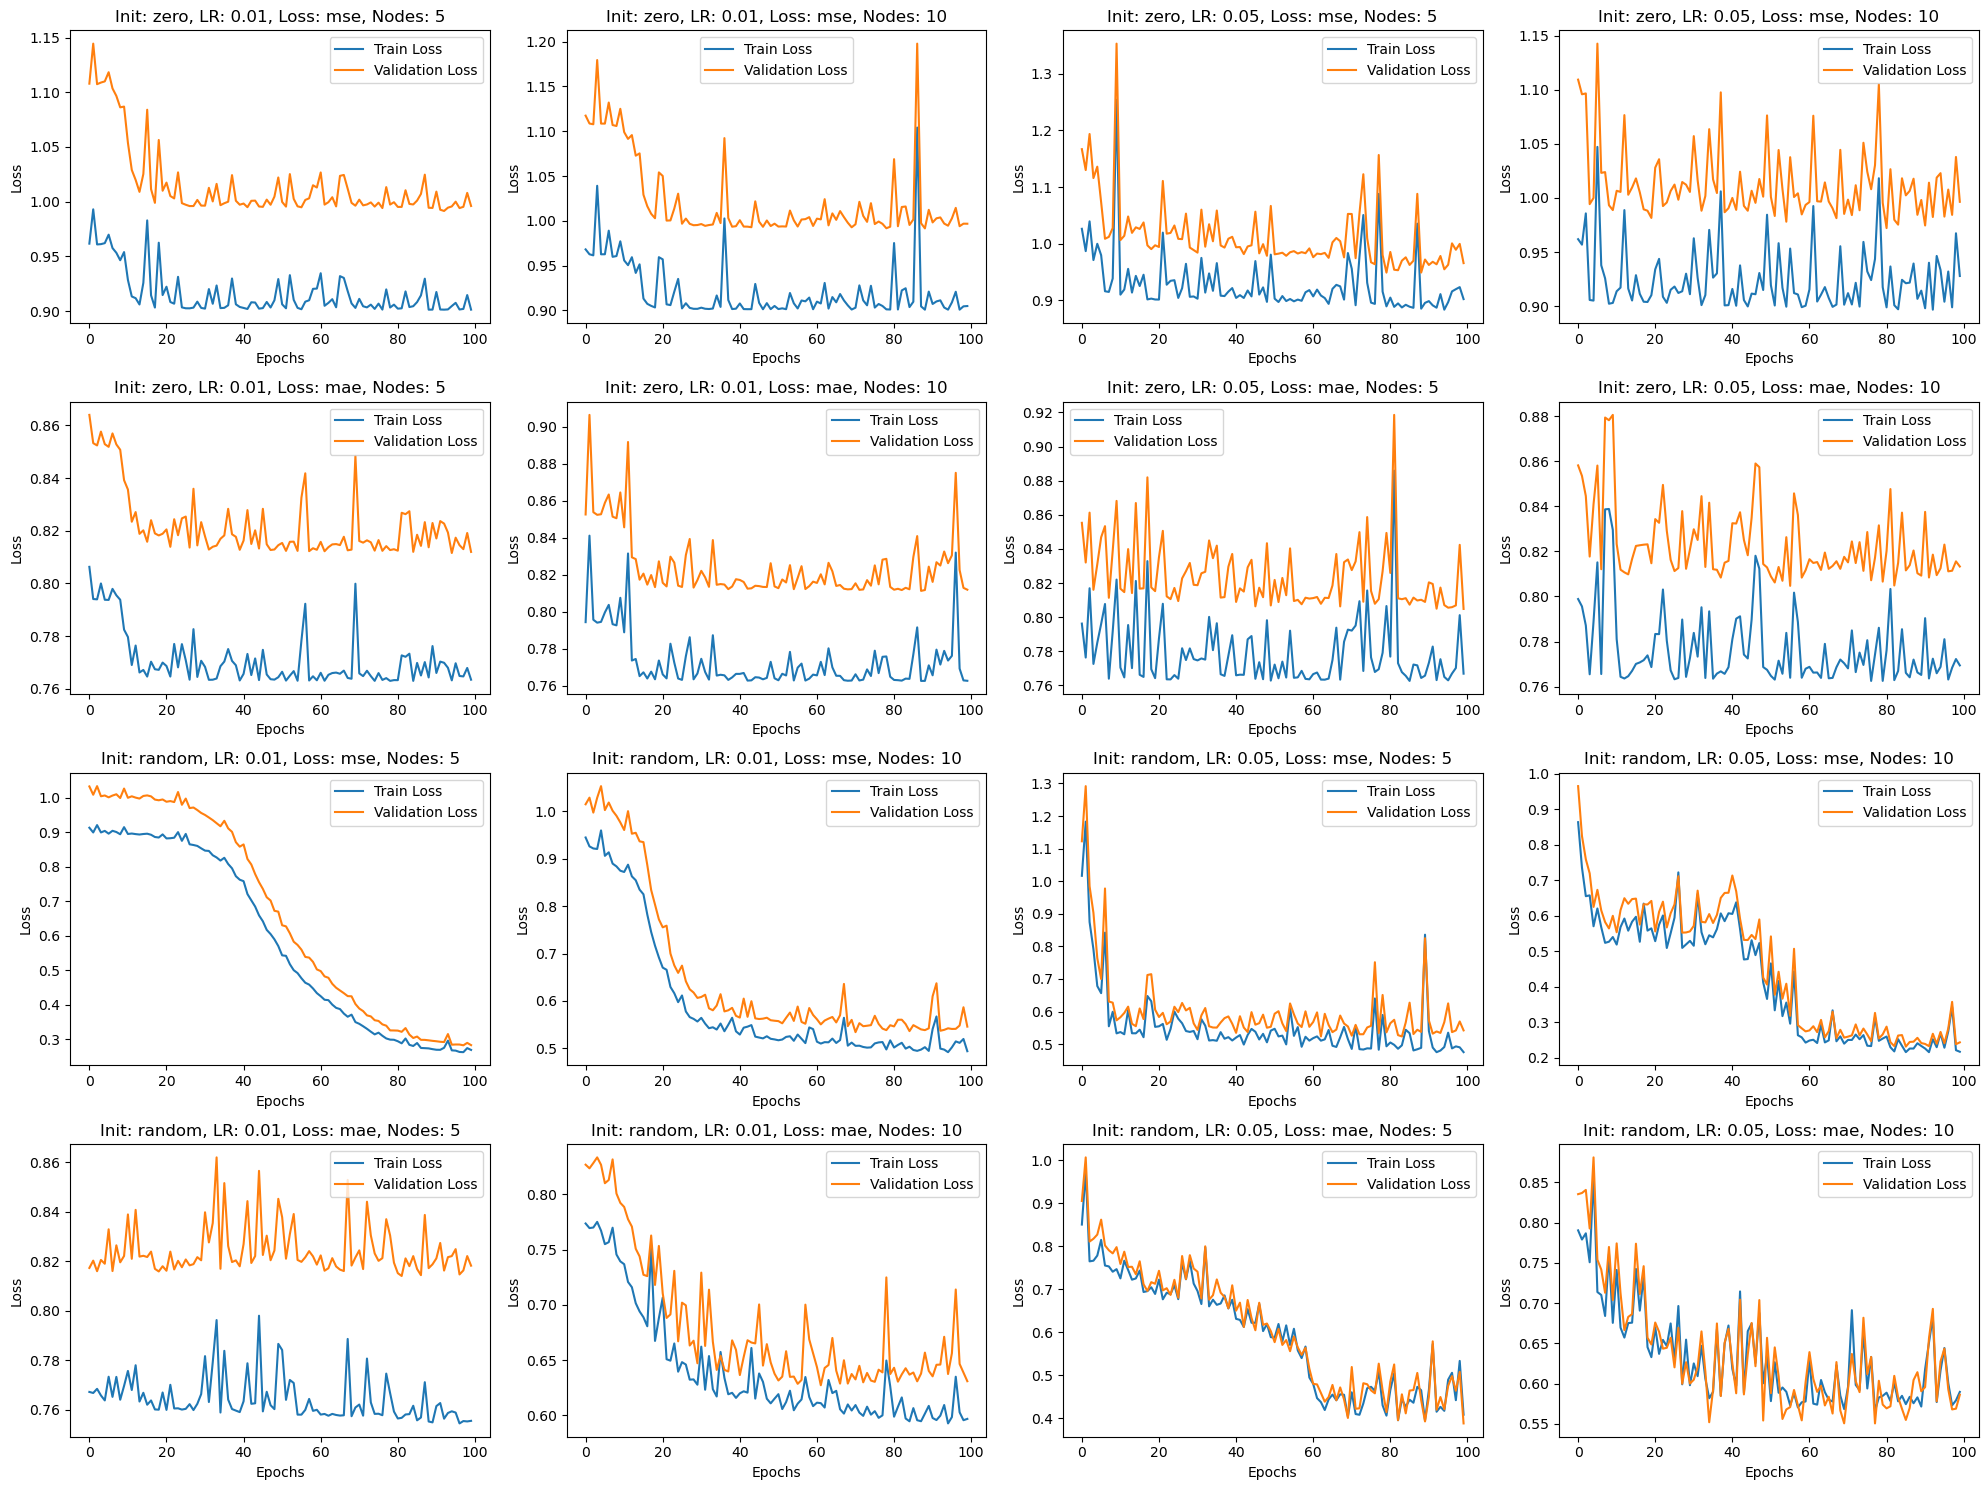

In [ ]:
variations = [
    {'init_type': 'zero', 'lr': 0.01, 'loss_fn': 'mse', 'hidden_nodes': 5},
    {'init_type': 'zero', 'lr': 0.01, 'loss_fn': 'mse', 'hidden_nodes': 10},
    {'init_type': 'zero', 'lr': 0.05, 'loss_fn': 'mse', 'hidden_nodes': 5},
    {'init_type': 'zero', 'lr': 0.05, 'loss_fn': 'mse', 'hidden_nodes': 10},
    {'init_type': 'zero', 'lr': 0.01, 'loss_fn': 'mae', 'hidden_nodes': 5},
    {'init_type': 'zero', 'lr': 0.01, 'loss_fn': 'mae', 'hidden_nodes': 10},
    {'init_type': 'zero', 'lr': 0.05, 'loss_fn': 'mae', 'hidden_nodes': 5},
    {'init_type': 'zero', 'lr': 0.05, 'loss_fn': 'mae', 'hidden_nodes': 10},
    {'init_type': 'random', 'lr': 0.01, 'loss_fn': 'mse', 'hidden_nodes': 5},
    {'init_type': 'random', 'lr': 0.01, 'loss_fn': 'mse', 'hidden_nodes': 10},
    {'init_type': 'random', 'lr': 0.05, 'loss_fn': 'mse', 'hidden_nodes': 5},
    {'init_type': 'random', 'lr': 0.05, 'loss_fn': 'mse', 'hidden_nodes': 10},
    {'init_type': 'random', 'lr': 0.01, 'loss_fn': 'mae', 'hidden_nodes': 5},
    {'init_type': 'random', 'lr': 0.01, 'loss_fn': 'mae', 'hidden_nodes': 10},
    {'init_type': 'random', 'lr': 0.05, 'loss_fn': 'mae', 'hidden_nodes': 5},
    {'init_type': 'random', 'lr': 0.05, 'loss_fn': 'mae', 'hidden_nodes': 10}
]

plt.figure(figsize=(20, 15))
for i, variation in enumerate(variations):
    mlp = MLPRegressor([2, variation['hidden_nodes'], 1], weight_type=variation['init_type'], lr=variation['lr'], loss_fn=variation['loss_fn'])
    train_losses, val_losses = mlp.train(X_train, y_train, X_val, y_val)
    
    plt.subplot(4, 4, i + 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f"Init: {variation['init_type']}, LR: {variation['lr']}, Loss: {variation['loss_fn']}, Nodes: {variation['hidden_nodes']}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

## Coments:

- When learning rates is lower(takes more time to converge),we can see less oscilation more stable solution,specialy with random initialization.High lr give faster convergence but may overshoting the optimal weights
- Zero initialization gives por performance as al neuron start with same weights,and random initialisation breaks symetry
- MSE in some case improve convergence speed and reducs larger errors.
- When lr is low(0.1) and hiden node is more,more oscilation and unstable solution.
- In case of more node and more stable solution and les oscilation
